# Avacado Project
Project Description
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold

Inspiration /Label 
The dataset can be seen in two angles to find the region and find the average price .
Task: One of Classification and other of Regression
Do both tasks in the same .ipynb file and submit at single file.

# By: Udit Lakhoria

Importing Important Libraries

In [1]:
import pandas as pd 
import numpy as np # For Basic computation 
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # For ploting 
%matplotlib inline
import warnings # For Filtering warnings
warnings.filterwarnings('ignore')

Importing Dataset

In [11]:
data=pd.read_csv(r'C:\Users\h\Desktop\avocado.csv')

In [12]:
data.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [13]:
data.tail()

Unnamed: 0        Date  AveragePrice  Total Volume     4046     4225  \
18244           7  2018-02-04          1.63      17074.83  2046.96  1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70  3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92  2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63  2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77  2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags     type  year  \
18244    0.00    13498.67    13066.82      431.85          0.0  organic  2018   
18245    0.00     9264.84     8940.04      324.80          0.0  organic  2018   
18246  727.94     9394.11     9351.80       42.31          0.0  organic  2018   
18247  727.01    10969.54    10919.54       50.00          0.0  organic  2018   
18248  224.53    12014.15    11988.14       26.01          0.0  organic  2018   

                 region  
18244  WestTexNewMexico  
18245  WestTexNewMexico  
18246  WestTexNewMexico  
18247  WestTexNewMexico  
18248  WestTexNewMexico

In [14]:
data.shape

(18249, 14)

Dataset Contains 18249 rows and 14 columns

Findind Missing Values

In [15]:
miss_val = data.isnull().sum().sort_values(ascending = False)
percent_miss_val =(miss_val/len(data))*100
print(pd.concat([miss_val, percent_miss_val], axis =1, keys =['Missing Values', 'Percentage Missing data']))

              Missing Values  Percentage Missing data
Unnamed: 0                 0                      0.0
Date                       0                      0.0
AveragePrice               0                      0.0
Total Volume               0                      0.0
4046                       0                      0.0
4225                       0                      0.0
4770                       0                      0.0
Total Bags                 0                      0.0
Small Bags                 0                      0.0
Large Bags                 0                      0.0
XLarge Bags                0                      0.0
type                       0                      0.0
year                       0                      0.0
region                     0                      0.0


# Observation
There is no missing values present in dataset. Now we can move forward


# Let's check the duplicate values if present in the dataset

In [17]:
data.duplicated().sum()  # This will determine the duplicate values for all the columns present in the dataset.

0

There is no duplicate values present in the dataset..So now we move on to statistical analysis part

In [18]:
data.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [19]:
#Let's check the datatypes of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


# Observations
1.There are 13 features present in the dataset.

2.Region has object datatype.

3.Date by default data type is object which need to change to datetime datatype.

4.Other variable are float & int datatypes.

In [20]:
# Changing datatype of date column
data['Date']=pd.to_datetime(data.Date)

# Let's use visualization tools to understand the dataset features

# Using Heatmap

<AxesSubplot:>

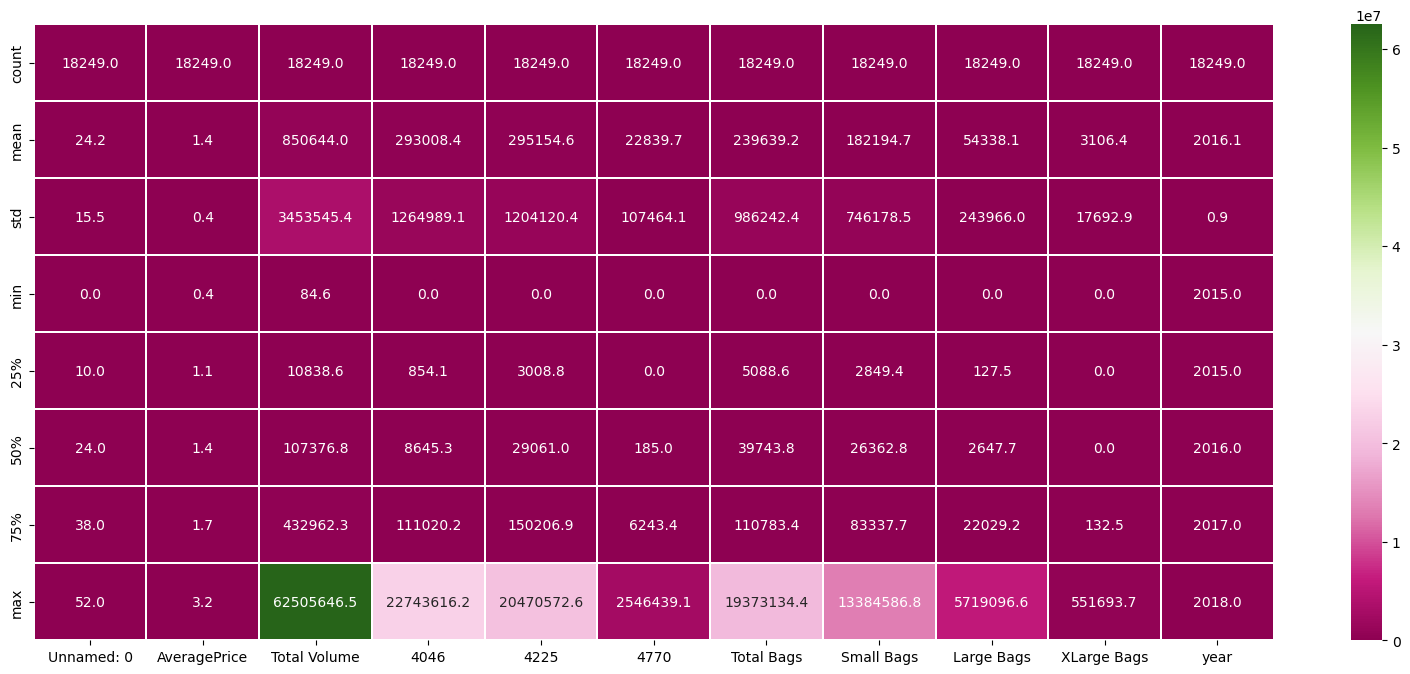

In [21]:

plt.figure(figsize=(20,8))
sns.heatmap(data.describe(),linewidths = 0.1,fmt='0.1f',annot = True,cmap='PiYG')

In [26]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.8+ MB


In [27]:
data.describe()

AveragePrice  Total Volume          4046          4225          4770  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04   
std        0.402677  3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00   
50%        1.370000  1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02   
75%        1.660000  4.329623e+05  1.110202e+05  1.502069e+05  6.243420e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags          year  
count  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000  18249.000000  
mean   2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   2016.147899  
std    9.862424e+05  7.461785e+05  2.439660e+05   17692.894652      0.939938  
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000   2015.000000  
25%    5.088640e+03  2.849420e+03  1.274700e+02       0.000000   2015.000000  
50%    3.974383e+04  2.636282e+04  2.647710e+03       0.000000   2016.000000  
75%    1.107834e+05  8.333767e+04  2.202925e+04     132.500000   2017.000000  
max    1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   2018.000000

# Observations
1.Looking at the 50% and max columns leads us to the reasonable conclusion that some of the features include outliers.

2. The minimum value for the majority of columns is zero.

3.Nearly all columns have mean values that are higher than median. The data has a right skew.

4.In most columns, the standard deviation number exceeds the mean, indicating that the data is dispersed.

Make some statistical analysis now. Find the average price of avocados during the specified time period and the appropriate types to start with.

In [29]:
print('Minimum Price of Avocado,',data.AveragePrice.min(),'USD')
print('Maximum Price of avacado,',data.AveragePrice.max(),'USD')
print('Average Price of avacado,',data.AveragePrice.mean(),'USD')

Minimum Price of Avocado, 0.44 USD
Maximum Price of avacado, 3.25 USD
Average Price of avacado, 1.4059784097758825 USD


<AxesSubplot:title={'center':'Distribution Price'}, xlabel='AveragePrice', ylabel='Density'>

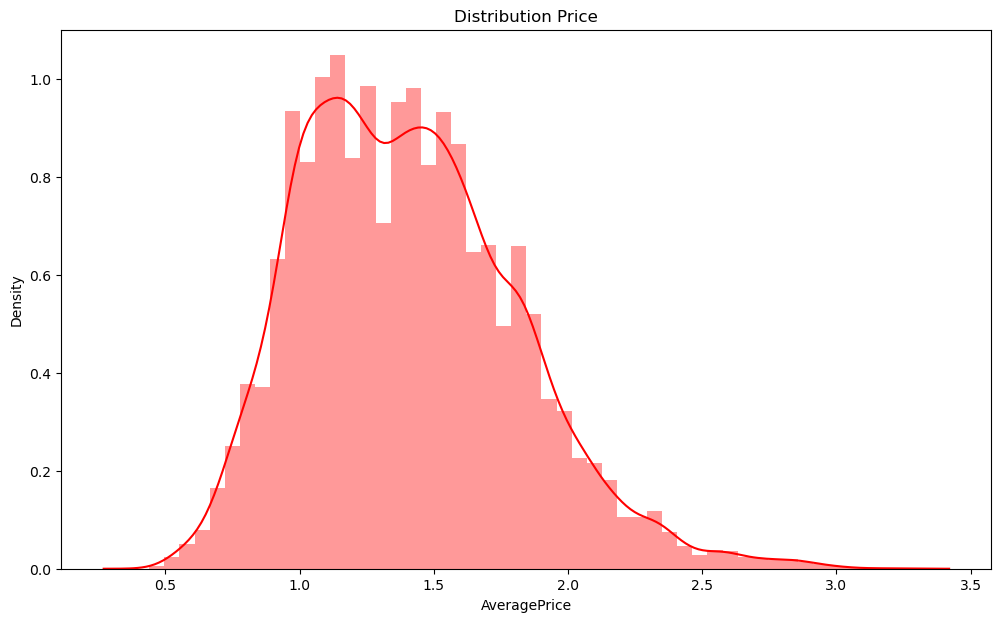

In [32]:
plt.figure(figsize=(12,7))
plt.title('Distribution Price')
sns.distplot(data["AveragePrice"], color='r')

As we see most of the time Avacado's average cost ranges from USD 1.1 to USD 1.6 per unit.

In [33]:
data['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [34]:
data.groupby('type')['AveragePrice'].mean()

type
conventional    1.158040
organic         1.653999
Name: AveragePrice, dtype: float64

Let's find out the difference between the price of conventional and Organic Avacado

In [35]:
print('Percentage difference in price of Conventional and organic avacados :',((1.65399-1.1580)/1.1580)*100,"%")

Percentage difference in price of Conventional and organic avacados : 42.831606217616596 %


<AxesSubplot:xlabel='AveragePrice', ylabel='type'>

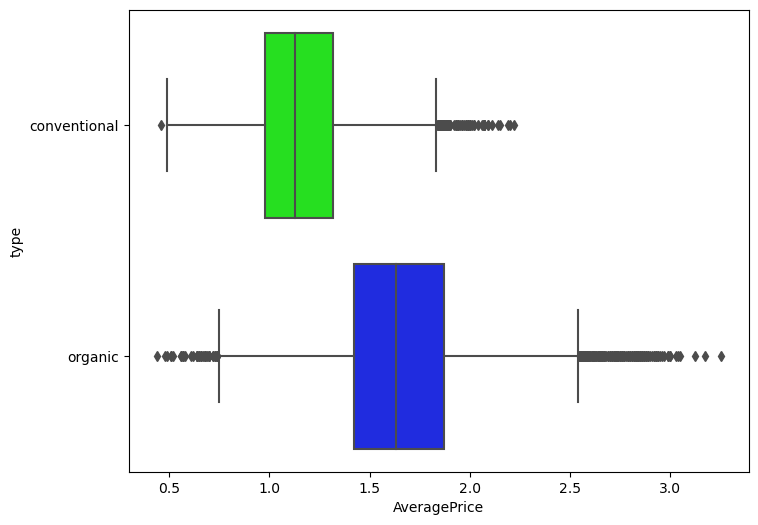

In [38]:
plt.figure(figsize=(8,6))
sns.boxplot(y="type", x="AveragePrice", data=data, palette = 'hsv')

# Observations
1.The price of organic avocado is over 43% more than that of regular avocado.

2.As can be seen, the average cost of an avocado that is organic is more than one that is conventional.

3.This is clear given that growing organic avocados is an expensive, labor-intensive process that requires patience & a lot of work.People who are concerned about their health and value quality are also prepared to pay extra for it.

Let's take a short look at the volumetric sale of avocados before digging further into the average price to acquire more information because there is a lot more to examine there. Since most individuals often don't want to spend extra, if such a scenario occurs, it will likely be reflected in overall sales.

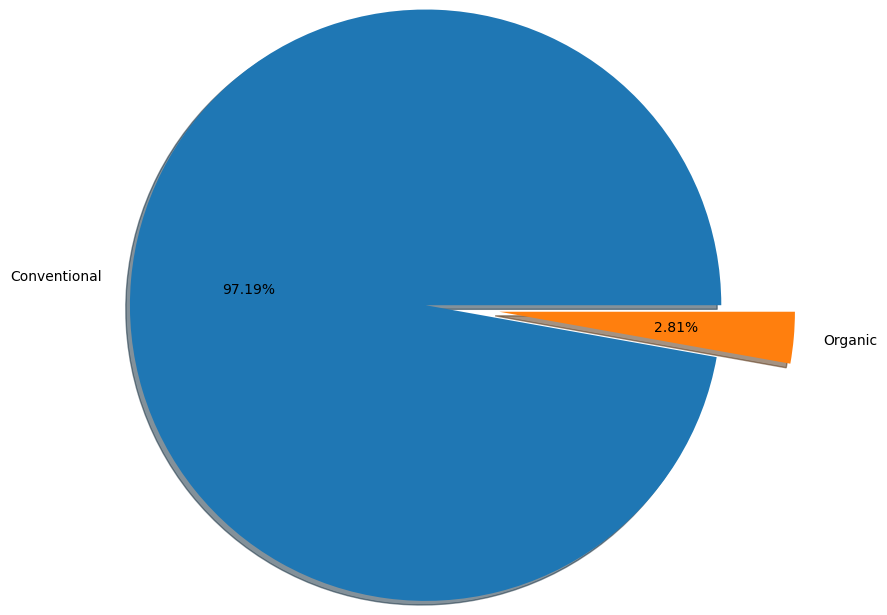

In [39]:
labels = 'Conventional','Organic',
fig, ax = plt.subplots()
ax.pie(data.groupby('type')['Total Volume'].mean(),labels = labels,radius =2,autopct = '%2.2f%%',explode=[0.3,0.2], shadow=True,)
plt.show()

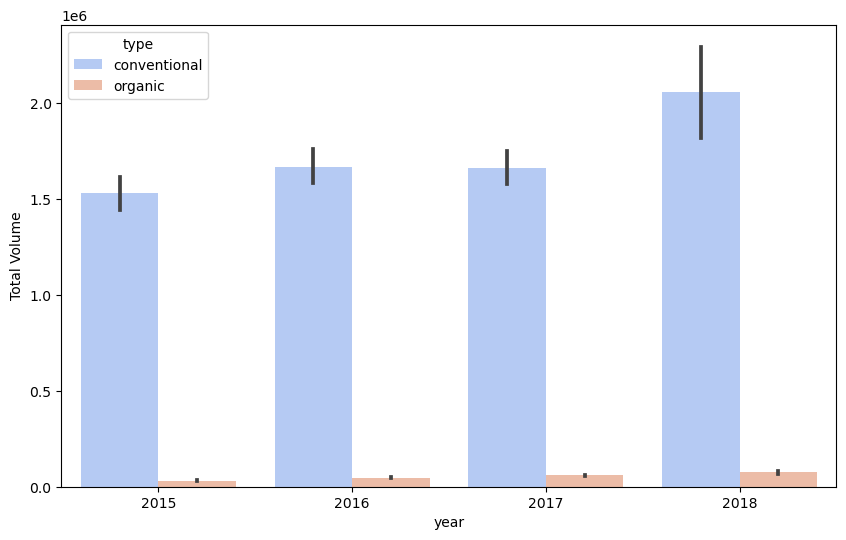

In [41]:
plt.figure(figsize=(10,6))
sns.barplot(x='year', y='Total Volume', hue='type',data=data, palette='coolwarm',ci=68)
plt.show()

# Observation

1.Less than 3% of organic avocado is sold.

2.Avacados grown traditionally are more popular.

3.The same is confirmed by a barplot for sales volume over time.

Let's take a deeper look to gain greater understanding of how the average price differs by year and season.

In [45]:
pd.crosstab([data.type,data.year],data.AveragePrice, margins= True).style.background_gradient(cmap='summer_r')

Let's Group them together

In [47]:
data.groupby(['year','type'])['AveragePrice'].agg([min,max,np.mean,np.median])

min   max      mean  median
year type                                      
2015 conventional  0.49  1.59  1.077963    1.08
     organic       0.81  2.79  1.673324    1.67
2016 conventional  0.51  2.20  1.105595    1.08
     organic       0.58  3.25  1.571684    1.53
2017 conventional  0.46  2.22  1.294888    1.30
     organic       0.44  3.17  1.735521    1.72
2018 conventional  0.56  1.74  1.127886    1.14
     organic       1.01  2.30  1.567176    1.55

# Observations
1.Organic avocado costs between 40 and 50 percent more than regular avocado.

2.In 2017, avocado prices increased for a variety of reasons, including inflation, supply shortages, and higher labour costs.

3.With the exception of 2017, the price of avocado has increased every year.

Price and demand go hand in hand. We need to check the voltalitity in demand as well

In [49]:
data.groupby(['year','type'])['Total Volume','Total Bags','Small Bags','Large Bags','XLarge Bags'].agg([sum])

Total Volume    Total Bags    Small Bags    Large Bags  \
                            sum           sum           sum           sum   
year type                                                                   
2015 conventional  4.296599e+09  7.481009e+08  6.194886e+08  1.231692e+08   
     organic       8.886943e+07  2.409134e+07  1.519414e+07  8.897192e+06   
2016 conventional  4.690250e+09  1.398101e+09  1.064426e+09  3.136371e+08   
     organic       1.306401e+08  6.505765e+07  4.206845e+07  2.298920e+07   
2017 conventional  4.766166e+09  1.541193e+09  1.145835e+09  3.713655e+08   
     organic       1.681399e+08  1.050962e+08  7.711715e+07  2.797352e+07   
2018 conventional  1.334206e+09  4.593696e+08  3.344334e+08  1.177311e+08   
     organic       4.853227e+07  3.216630e+07  2.630799e+07  5.852903e+06   

                   XLarge Bags  
                           sum  
year type                       
2015 conventional   5443128.28  
     organic              0.00  
2016 conventional  20038284.84  
     organic              0.00  
2017 conventional  23991658.41  
     organic           5513.93  
2018 conventional   7205184.07  
     organic           5407.80

# Observations
1.Since avacados sold more in 2017 than in 2016, the price increase may be the consequence of rising demand or a problem with the supply chain.

2.revenues in turn Over time, demand has also increased.

3.Even though organic avocados are about 50% more expensive than conventional ones, sales of them increased by 30% in 2017 compared to 2016.

4.The market for conventional avocados is increasing year over year, although at a slower rate than the desire for organic varieties. Perhaps people are becoming more health-conscious.

5.Sales of XLarge Bags surge in 2017 as compared to 2015.


In [51]:
data.sort_values(by=['Date'], inplace=True, ascending=True)


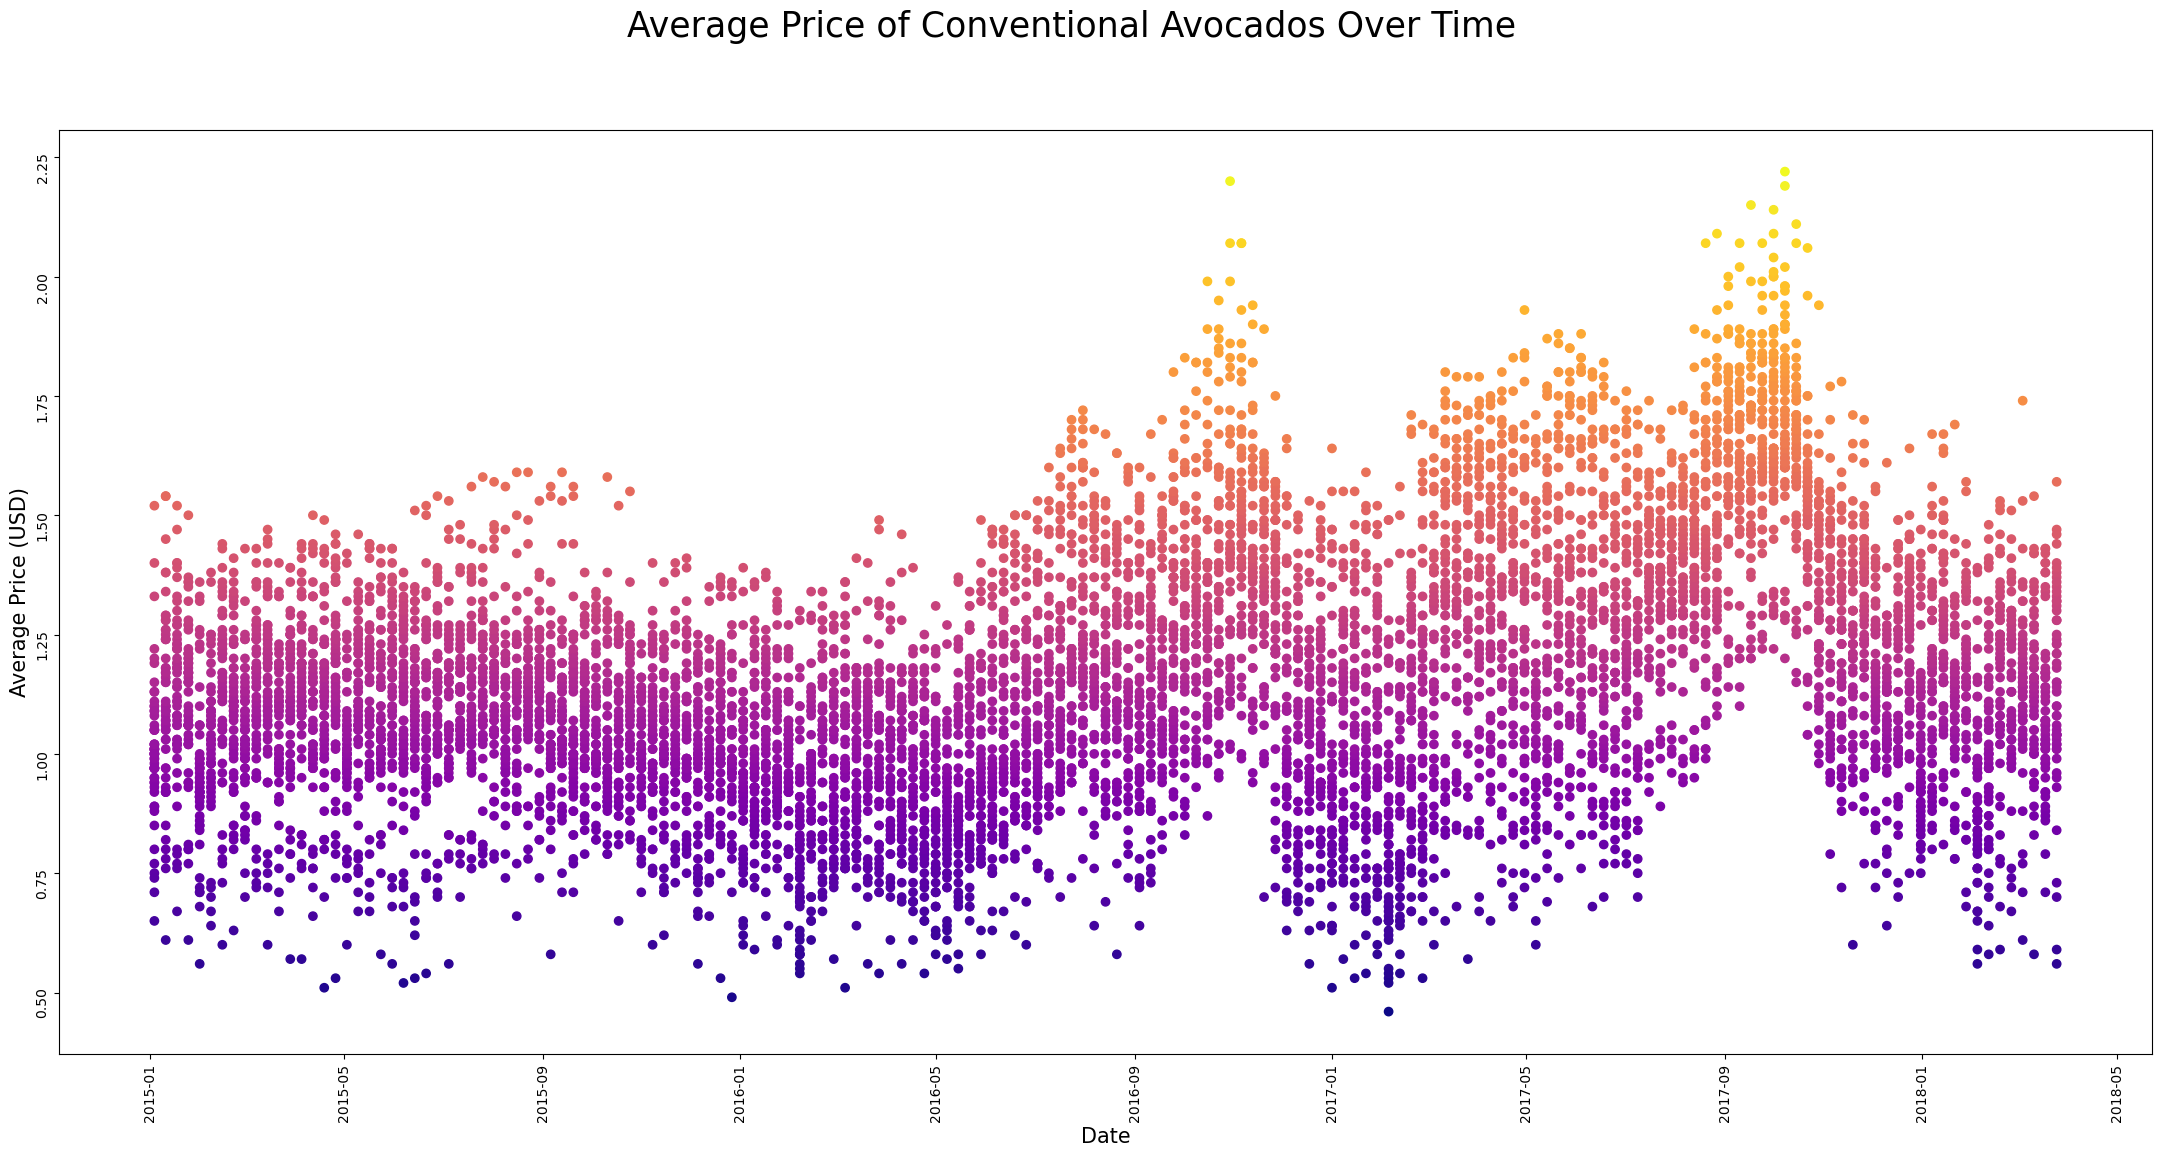

In [52]:
# Average price of Conventional Avocados over time

mask = data['type']== 'conventional'
plt.rc('figure', titlesize=20)
fig = plt.figure(figsize = (27, 12))
fig.suptitle('Average Price of Conventional Avocados Over Time', fontsize=25)
ax = fig.add_subplot(111)

dates = data[mask]['Date'].tolist()
avgPrices = data[mask]['AveragePrice'].tolist()

plt.scatter( dates,avgPrices, c=avgPrices, cmap='plasma')
ax.set_xlabel('Date',fontsize = 15,)
ax.set_ylabel('Average Price (USD)', fontsize = 15)
ax.set_xlim()
ax.tick_params(labelrotation=90)

plt.show()

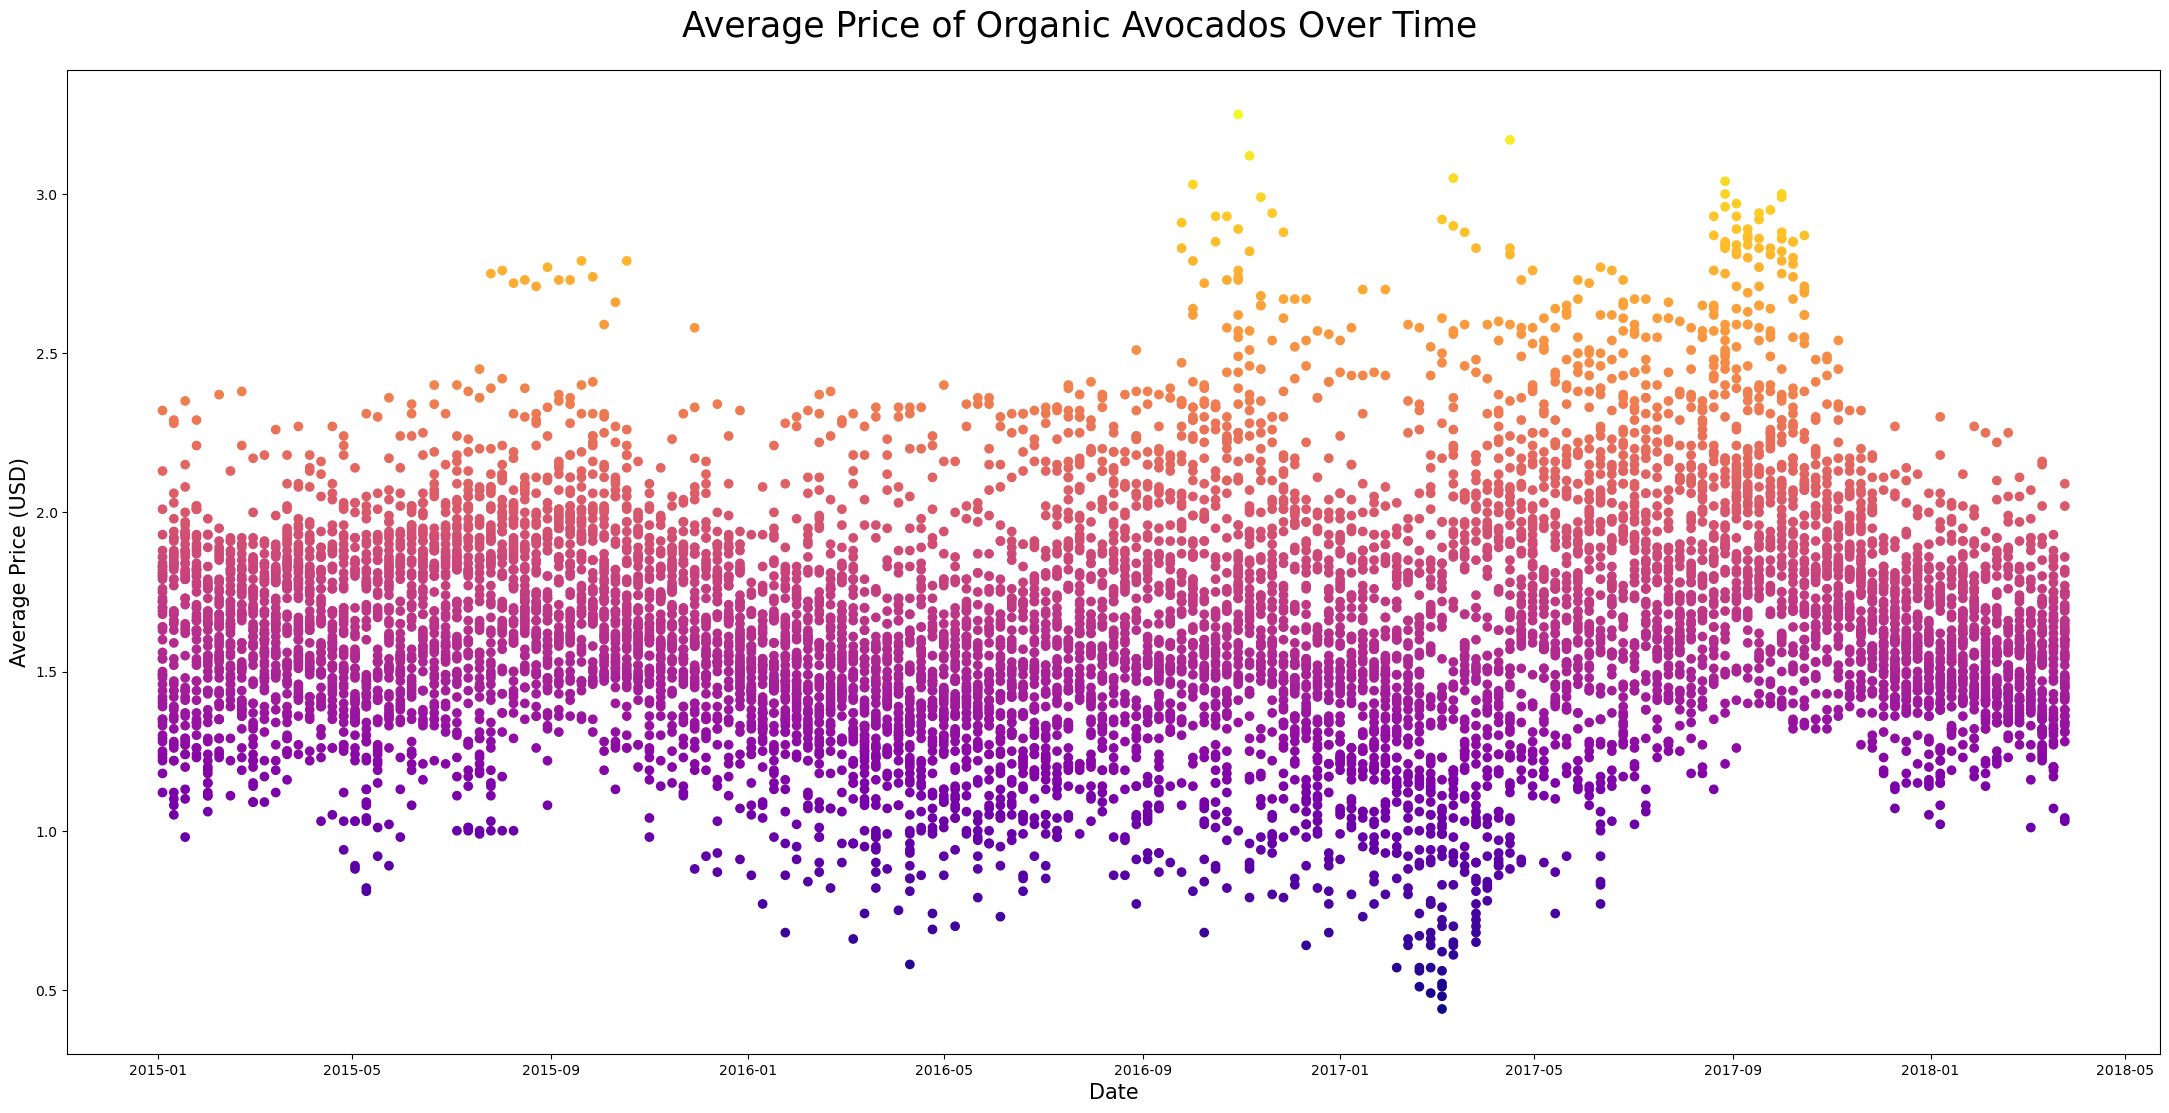

In [53]:
# Average price of Organic Avocados over time
mask = data['type']== 'organic'
plt.rc('figure', titlesize=20)
fig = plt.figure(figsize = (27, 12))
fig.suptitle('Average Price of Organic Avocados Over Time', fontsize=25)
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.93)

dates = data[mask]['Date'].tolist()
avgPrices = data[mask]['AveragePrice'].tolist()

plt.scatter(dates,avgPrices, c=avgPrices, cmap='plasma')
ax.set_xlabel('Date',fontsize = 15)
ax.set_ylabel('Average Price (USD)', fontsize = 15)
plt.xlim()
plt.show()

In [54]:
data.groupby(['region'])['Total Volume','AveragePrice'].agg([sum])

Total Volume AveragePrice
                              sum          sum
region                                        
Albany               1.606780e+07       527.63
Atlanta              8.860512e+07       452.23
BaltimoreWashington  1.347139e+08       518.57
Boise                1.441319e+07       455.67
Boston               9.727398e+07       517.44
BuffaloRochester     2.296247e+07       512.69
California           1.028982e+09       471.62
Charlotte            3.555554e+07       542.84
Chicago              1.337023e+08       526.19
CincinnatiDayton     4.452201e+07       408.71
Columbus             2.999336e+07       423.44
DallasFtWorth        2.084193e+08       366.93
Denver               1.389025e+08       411.88
Detroit              6.342242e+07       431.32
GrandRapids          3.021174e+07       508.69
GreatLakes           5.896425e+08       452.43
HarrisburgScranton   4.180886e+07       511.49
HartfordSpringfield  5.067054e+07       614.70
Houston              2.031679e+08       354.20
Indianapolis         3.026339e+07       444.13
Jacksonville         2.879000e+07       510.70
LasVegas             5.437691e+07       466.75
LosAngeles           5.078965e+08       411.01
Louisville           1.609700e+07       434.90
MiamiFtLauderdale    9.767322e+07       482.83
Midsouth             5.083494e+08       474.81
Nashville            3.561209e+07       409.69
NewOrleansMobile     4.569514e+07       441.02
NewYork              2.407341e+08       583.92
Northeast            7.132809e+08       541.45
NorthernNewEngland   7.153289e+07       499.36
Orlando              5.866070e+07       509.10
Philadelphia         7.183880e+07       551.66
PhoenixTucson        1.956433e+08       413.86
Pittsburgh           1.880635e+07       461.14
Plains               3.111885e+08       485.54
Portland             1.105522e+08       445.39
RaleighGreensboro    4.820273e+07       525.63
RichmondNorfolk      4.223085e+07       436.47
Roanoke              2.504201e+07       421.80
Sacramento           7.516375e+07       548.09
SanDiego             8.979192e+07       472.58
SanFrancisco         1.358302e+08       609.82
Seattle              1.092142e+08       487.59
SouthCarolina        6.075377e+07       474.31
SouthCentral         1.011280e+09       372.22
Southeast            6.152384e+08       472.53
Spokane              1.556528e+07       488.61
StLouis              3.207283e+07       483.55
Syracuse             1.094267e+07       513.87
Tampa                6.600454e+07       476.19
TotalUS              5.864740e+09       445.83
West                 1.086779e+09       430.01
WestTexNewMexico     1.445218e+08       422.67

In [55]:
data.head(10)

Date  AveragePrice  Total Volume        4046       4225      4770  \
11569 2015-01-04          1.75      27365.89     9307.34    3844.81    615.28   
9593  2015-01-04          1.49      17723.17     1189.35   15628.27      0.00   
10009 2015-01-04          1.68       2896.72      161.68     206.96      0.00   
1819  2015-01-04          1.52      54956.80     3013.04   35456.88   1561.70   
9333  2015-01-04          1.64       1505.12        1.27    1129.50      0.00   
2807  2015-01-04          0.75     758118.95   426878.87  147958.43  15267.89   
1195  2015-01-04          0.85    2682159.95  1837999.65  524430.47  64225.78   
10269 2015-01-04          1.50       6329.83     3730.80    2141.91      0.00   
103   2015-01-04          1.00     435021.49   364302.39   23821.16     82.15   
1143  2015-01-04          0.80     317861.35   134003.07  120628.37   4591.23   

       Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
11569    13598.46    13061.10      537.36         0.00       organic  2015   
9593       905.55      905.55        0.00         0.00       organic  2015   
10009     2528.08     2528.08        0.00         0.00       organic  2015   
1819     14925.18    11264.80     3660.38         0.00  conventional  2015   
9333       374.35      186.67      187.68         0.00       organic  2015   
2807    168013.76   165202.22     2811.54         0.00  conventional  2015   
1195    255504.05   215571.80    36981.72      2950.53  conventional  2015   
10269      457.12      426.67       30.45         0.00       organic  2015   
103      46815.79    16707.15    30108.64         0.00  conventional  2015   
1143     58638.68    58126.59      512.09         0.00  conventional  2015   

                   region  
11569           Southeast  
9593              Chicago  
10009  HarrisburgScranton  
1819           Pittsburgh  
9333                Boise  
2807     WestTexNewMexico  
1195           LosAngeles  
10269            LasVegas  
103               Atlanta  
1143             LasVegas

# Exploratory Data Analysis

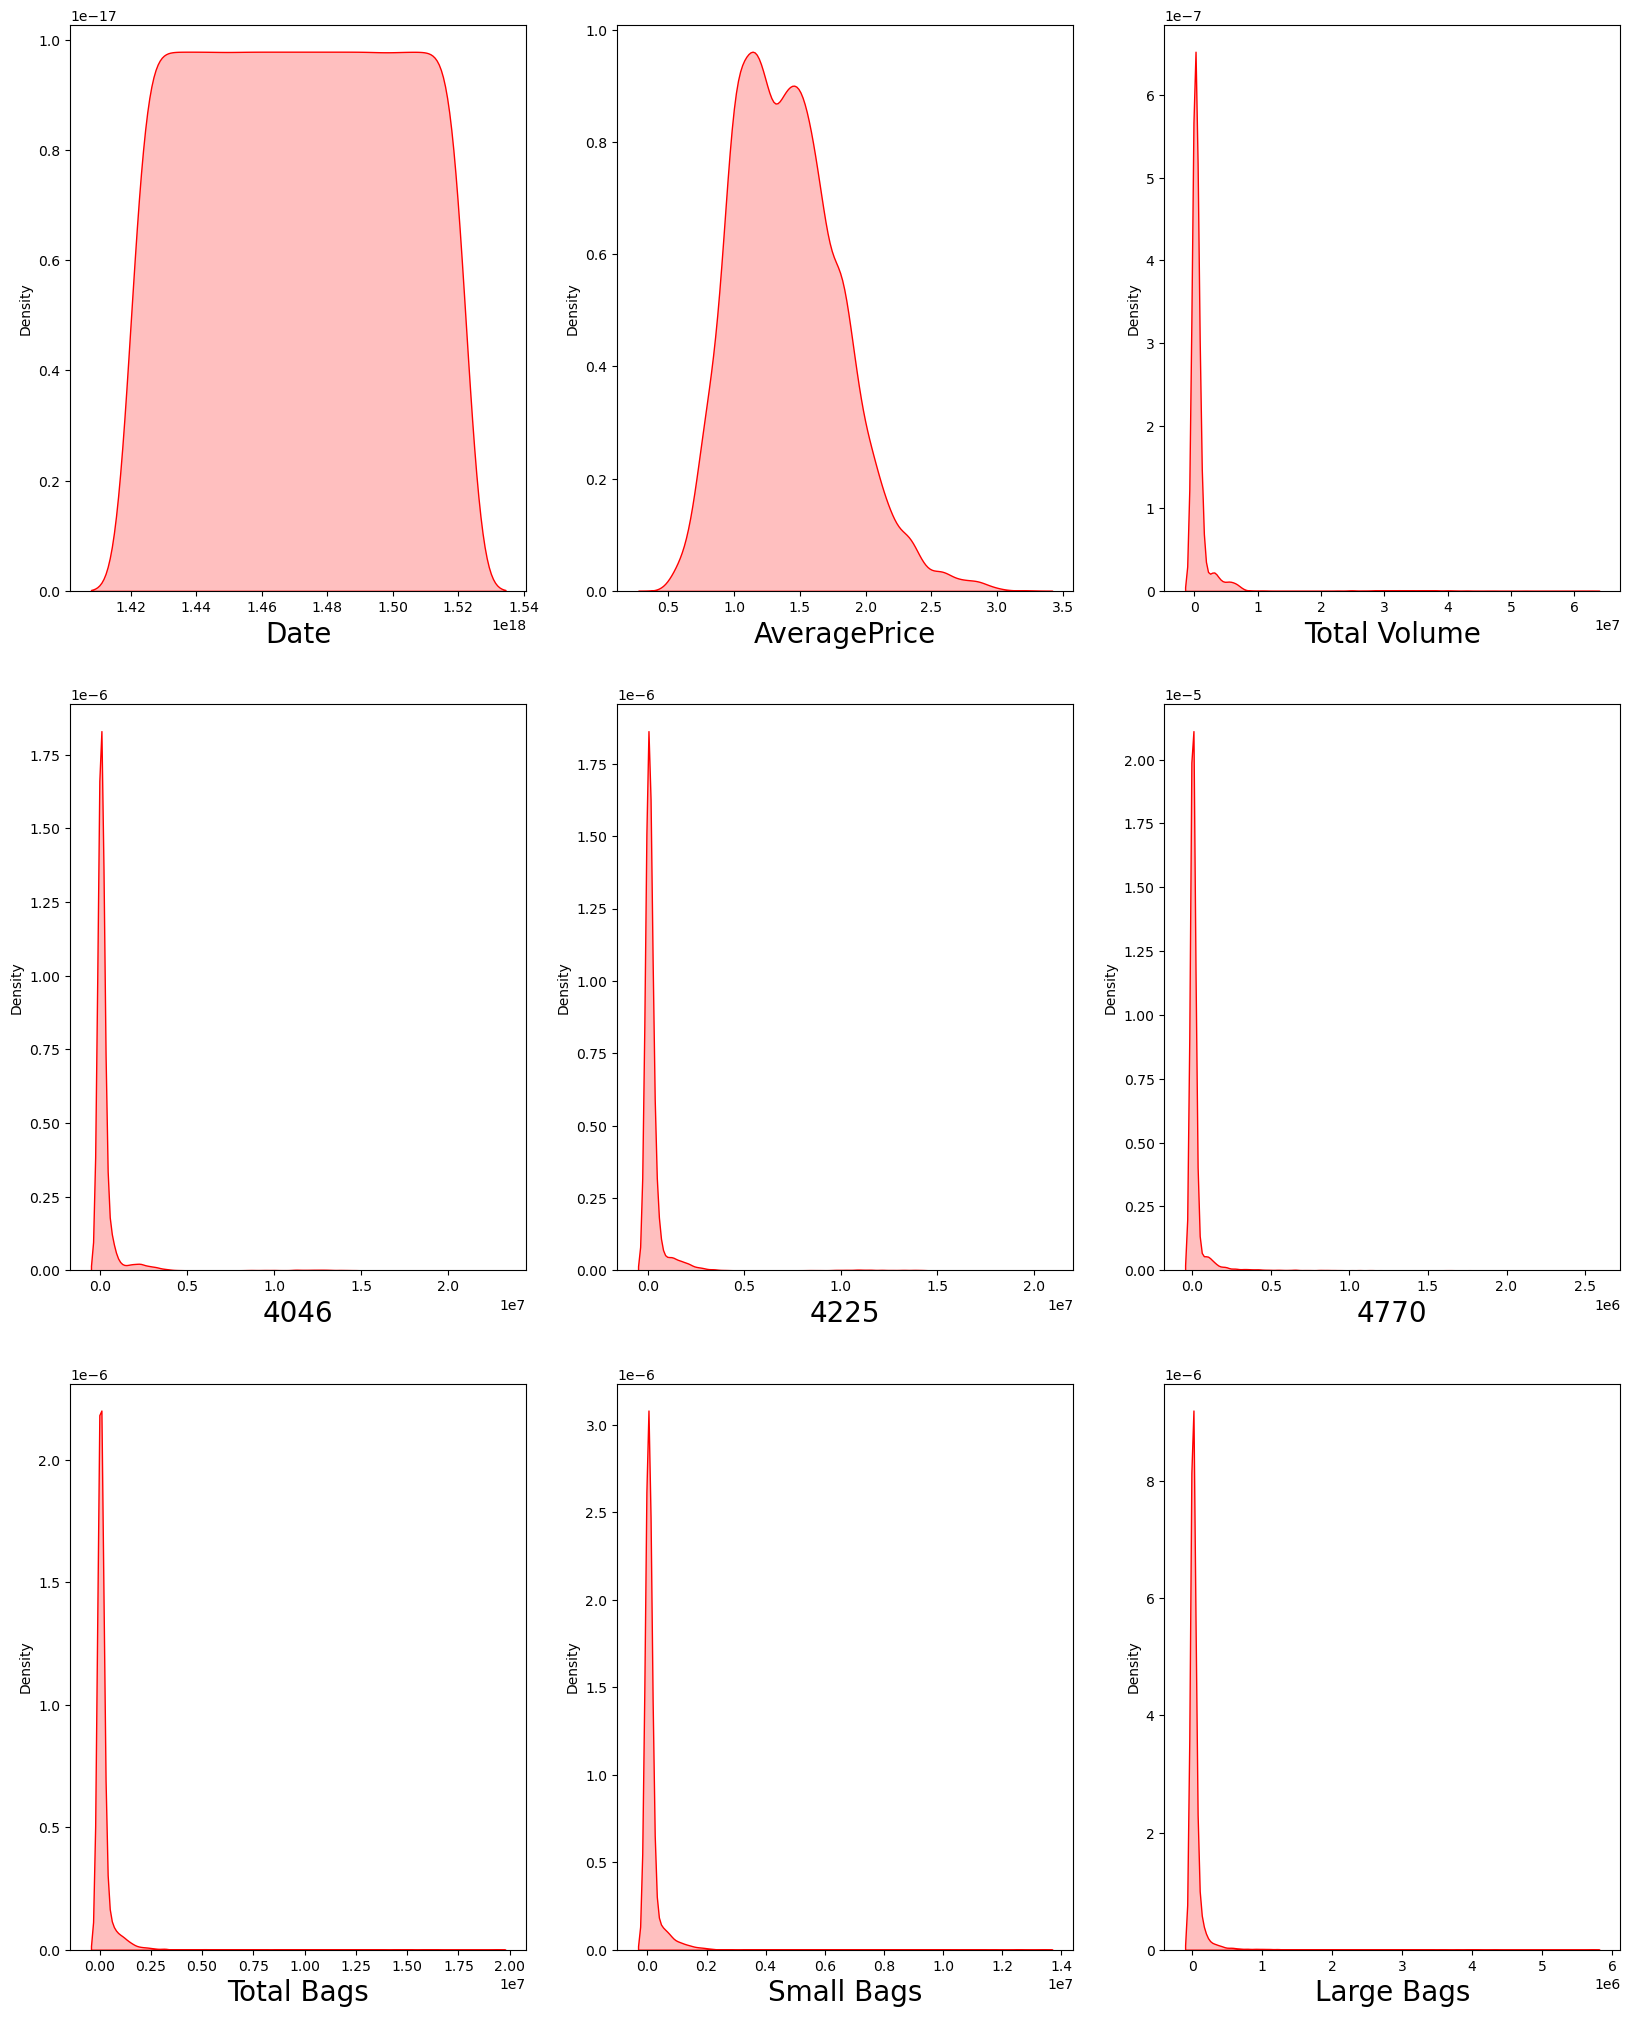

In [56]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber =1
for column in data:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column], color='r',hist=False,kde_kws={"shade": True})
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

Observation:
1.Skewed data can be seen when outliers have steep peaks.

2.The majority of plots are right-skewed, with mean values that are quite low compared to median and standard deviation. This has caused a sudden, high peak.As we proceed from zero to the opposite end of the x-axis, there are a very small number of data points.

Seasonal variations also affect the year-round availability and cost of avocados.Let's examine the monthly changes in average pricing and sales volume.

In order to do this, let's build a second copy of the dataframe and divide the date column into Year, Month, and Day.

In [62]:
#We need to once again import the dataset and copy it in the another dataframe
data2=pd.read_csv(r'C:\Users\h\Desktop\avocado.csv')

In [63]:
data2['Year'], data2['Month'], data2['Day'] = data2['Date'].str.split('-').str
data2.drop(columns=['Date','year'], inplace=True)
data2

Unnamed: 0  AveragePrice  Total Volume     4046       4225    4770  \
0               0          1.33      64236.62  1036.74   54454.85   48.16   
1               1          1.35      54876.98   674.28   44638.81   58.33   
2               2          0.93     118220.22   794.70  109149.67  130.50   
3               3          1.08      78992.15  1132.00   71976.41   72.58   
4               4          1.28      51039.60   941.48   43838.39   75.78   
...           ...           ...           ...      ...        ...     ...   
18244           7          1.63      17074.83  2046.96    1529.20    0.00   
18245           8          1.71      13888.04  1191.70    3431.50    0.00   
18246           9          1.87      13766.76  1191.92    2452.79  727.94   
18247          10          1.93      16205.22  1527.63    2981.04  727.01   
18248          11          1.62      17489.58  2894.77    2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0         8696.87     8603.62       93.25          0.0  conventional   
1         9505.56     9408.07       97.49          0.0  conventional   
2         8145.35     8042.21      103.14          0.0  conventional   
3         5811.16     5677.40      133.76          0.0  conventional   
4         6183.95     5986.26      197.69          0.0  conventional   
...           ...         ...         ...          ...           ...   
18244    13498.67    13066.82      431.85          0.0       organic   
18245     9264.84     8940.04      324.80          0.0       organic   
18246     9394.11     9351.80       42.31          0.0       organic   
18247    10969.54    10919.54       50.00          0.0       organic   
18248    12014.15    11988.14       26.01          0.0       organic   

                 region  Year Month Day  
0                Albany  2015    12  27  
1                Albany  2015    12  20  
2                Albany  2015    12  13  
3                Albany  2015    12  06  
4                Albany  2015    11  29  
...                 ...   ...   ...  ..  
18244  WestTexNewMexico  2018    02  04  
18245  WestTexNewMexico  2018    01  28  
18246  WestTexNewMexico  2018    01  21  
18247  WestTexNewMexico  2018    01  14  
18248  WestTexNewMexico  2018    01  07  

[18249 rows x 15 columns]

In [65]:
# Converting Datetime datatypes to integer datatype
data2['Year']=data2['Year'].astype(int)
data2['Month']=data2['Month'].astype(int)
data2['Date']=data2['Day'].astype(int)

In [66]:
data2.drop(columns=['Day'],axis=1, inplace=True)

In [67]:
data2.drop(columns=['Date'],axis=1, inplace=True)

In [68]:
data2.tail()

Unnamed: 0  AveragePrice  Total Volume     4046     4225    4770  \
18244           7          1.63      17074.83  2046.96  1529.20    0.00   
18245           8          1.71      13888.04  1191.70  3431.50    0.00   
18246           9          1.87      13766.76  1191.92  2452.79  727.94   
18247          10          1.93      16205.22  1527.63  2981.04  727.01   
18248          11          1.62      17489.58  2894.77  2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags     type  \
18244    13498.67    13066.82      431.85          0.0  organic   
18245     9264.84     8940.04      324.80          0.0  organic   
18246     9394.11     9351.80       42.31          0.0  organic   
18247    10969.54    10919.54       50.00          0.0  organic   
18248    12014.15    11988.14       26.01          0.0  organic   

                 region  Year  Month  
18244  WestTexNewMexico  2018      2  
18245  WestTexNewMexico  2018      1  
18246  WestTexNewMexico  2018      1  
18247  WestTexNewMexico  2018      1  
18248  WestTexNewMexico  2018      1

In [69]:
#Date, month, and year-based univariate feature analysis

In [71]:
# Checking unique values
data2['Year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: Year, dtype: int64

<AxesSubplot:xlabel='Year', ylabel='count'>

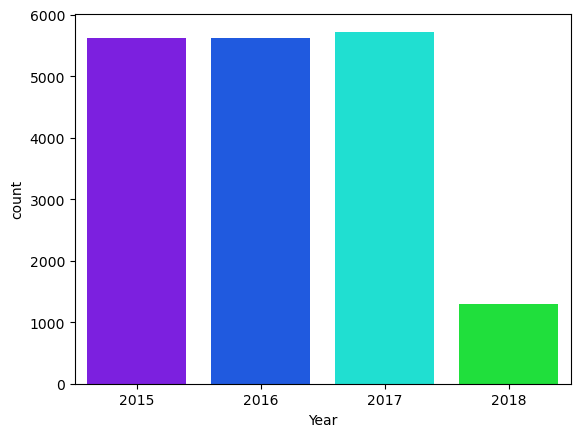

In [72]:
sns.countplot('Year',data=data2)

Data in this set date from 2015 to 2018.
The year 2017 saw the most sales entries, while 2018 saw very few sales entries.

<AxesSubplot:xlabel='Month', ylabel='count'>

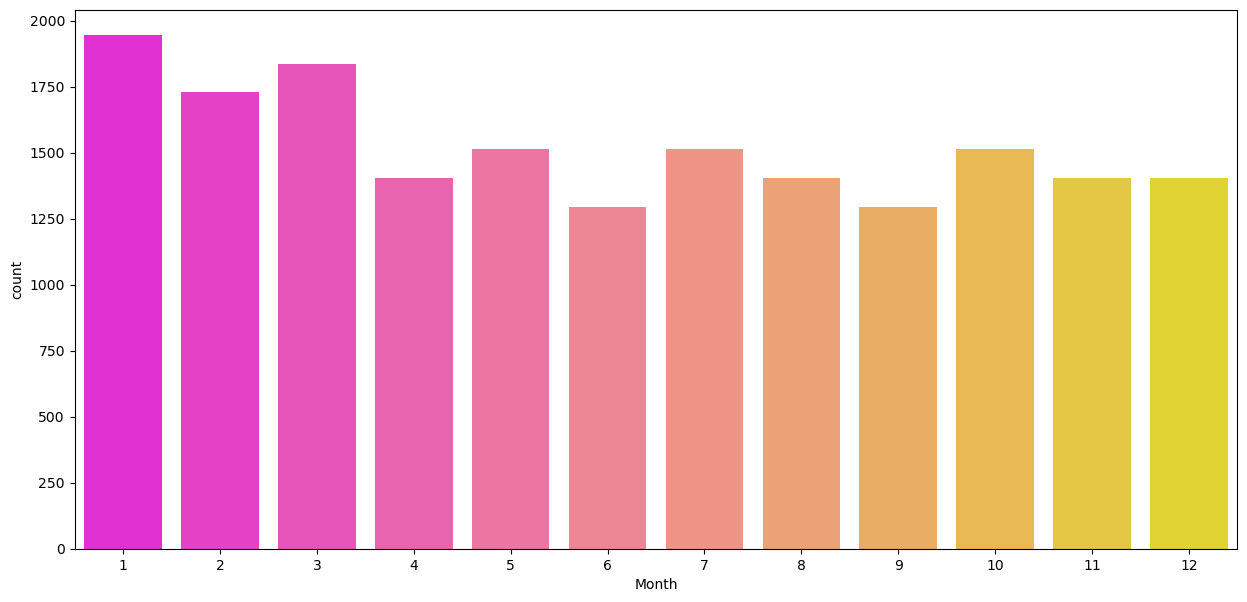

In [74]:
#Checking month wise sale
plt.figure(figsize=(15,7))
sns.countplot(x='Month', data=data2, palette="spring")

In [75]:
data2['Month'].value_counts().max() #To find Maximum 

1944

In [77]:
data2['Month'].value_counts().min()#To find minimum

1294

The months of January, February, and March see the most sales leads.
The months of January (1944 lead) and June (1976 lead) saw the highest and lowest sales demand for avocados, respectively.


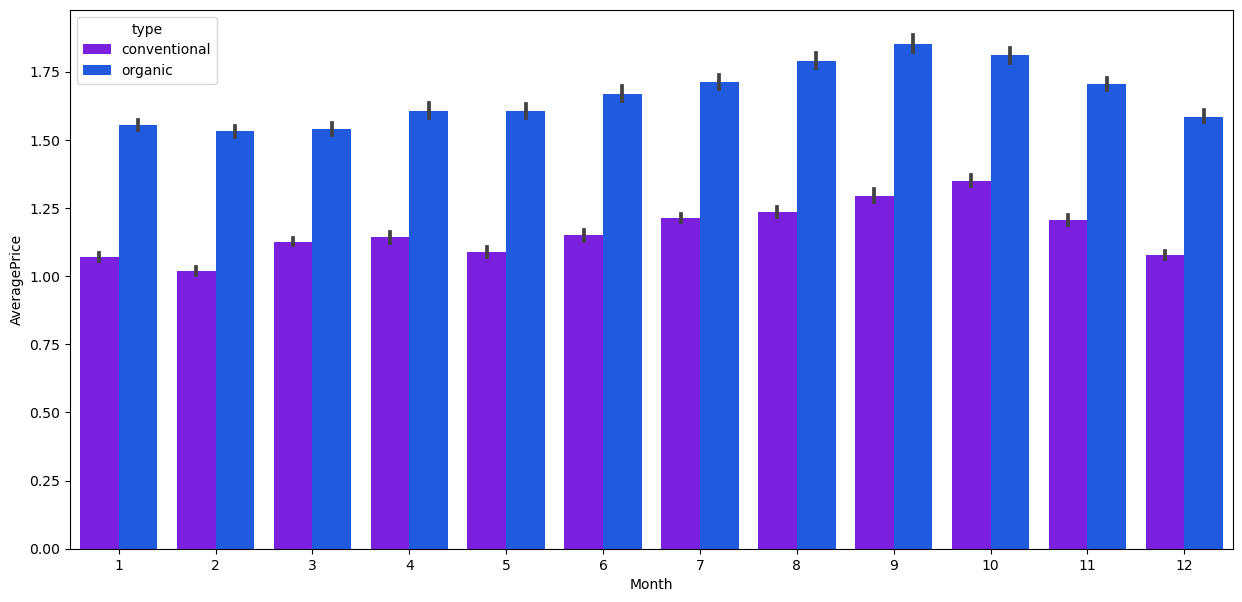

In [79]:
#Checking variations
plt.figure(figsize=(15,7))
sns.barplot(x="Month", y="AveragePrice", hue='type', data=data2)
plt.show()

<Figure size 1000x1000 with 0 Axes>

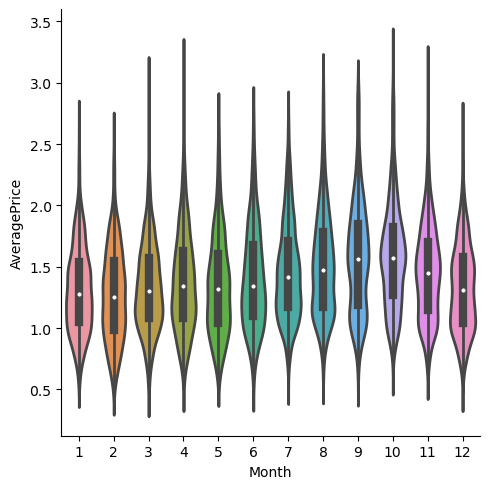

In [81]:
plt.figure(figsize=(10,10))
sns.catplot(x = "Month", y = "AveragePrice", kind ='violin', data=data2, linewidth=2)
plt.show()

# Observations
1.Conventional avacado prices are often higher in September and October than they are in other months.

2.Over a year period, there hasn't been significant change in organic type avocado.

3.The above groupby table shows the fluctuation in mean price values, which supports the results of the barplot.

Now compare the Countplot of Sales Entries to the Barplot of Monthly Average Price.

At first glance, we can observe that prices are high from August to October, and sales are also at their lowest at that time.

It is accurate to say the opposite from January through March.

This variation is relevant to conventional types, but we were unable to discover any connection with organic avacados.

In conclusion, fewer sales orders are seen when the average sale price of "Conventional Avacado" is high at the same time. Customers are less likely to purchase avocados at high prices, to put it briefly.

# It's time to investigate the region feature as we haven't yet.

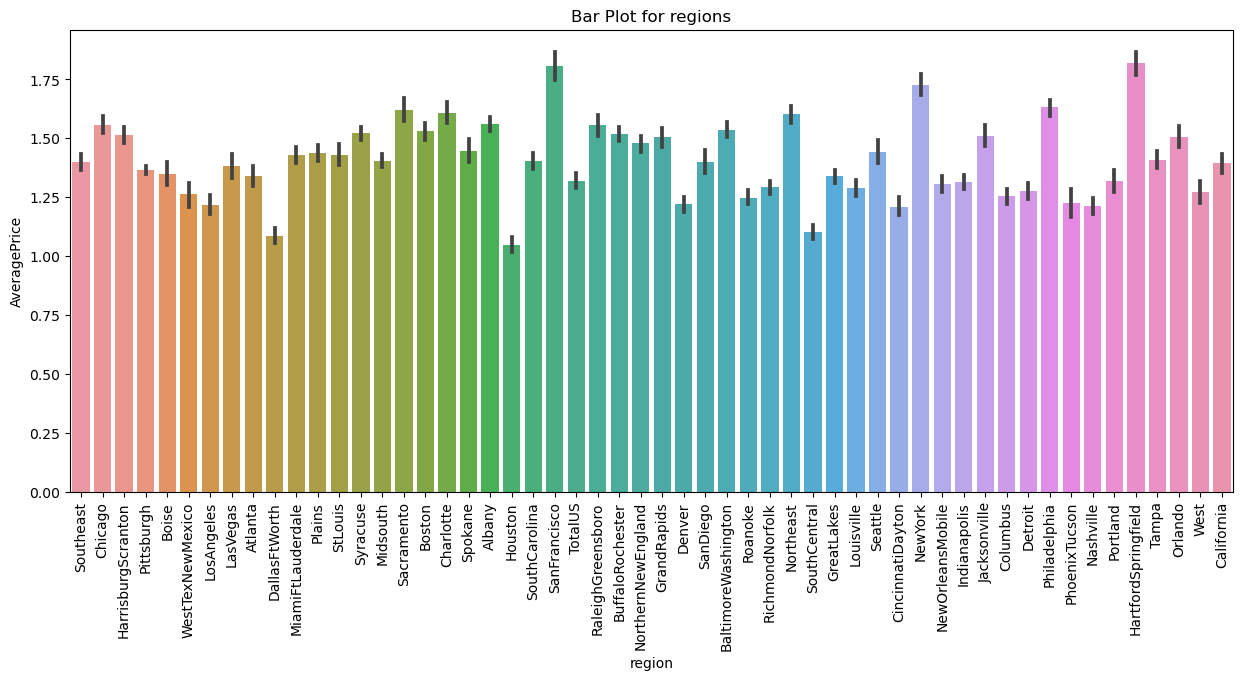

In [83]:
plt.figure(figsize=(15,6))
sns.barplot(x=data['region'],y=data['AveragePrice'], data=data2)
plt.title(f'Bar Plot for regions')
plt.xticks(rotation=90)
plt.show()

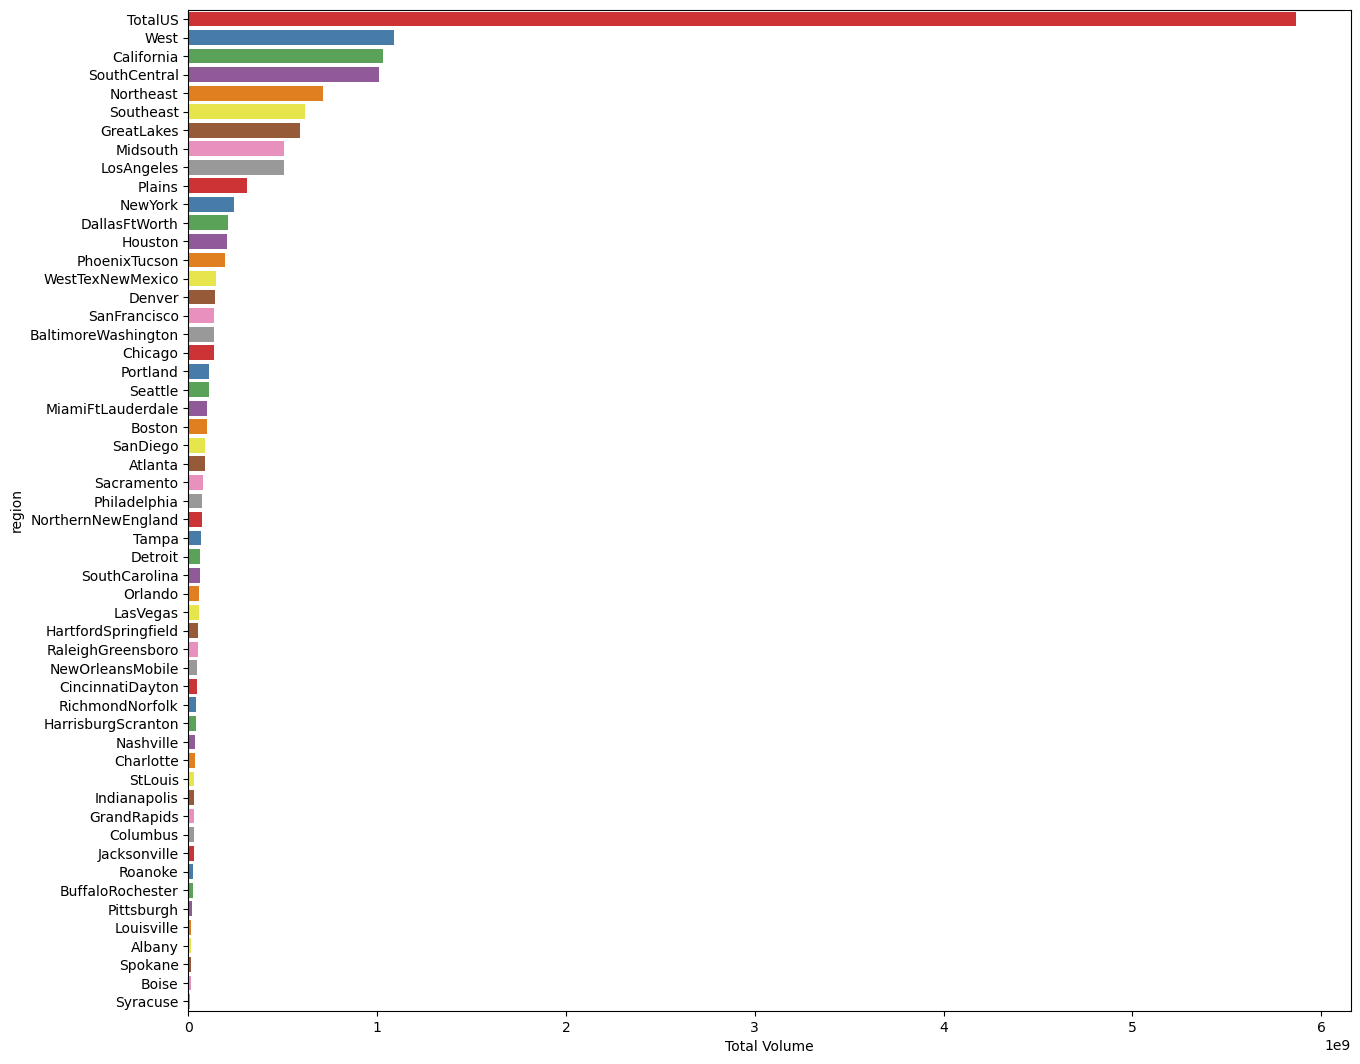

In [85]:
region = data.groupby('region')['Total Volume'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(15,13))
sns.barplot(x=region["Total Volume"], y=region["region"], data=data, palette="Set1")
plt.show()

In [86]:
data.groupby(['region'])['Total Volume','Total Bags','Small Bags','Large Bags','XLarge Bags'].agg([np.mean])

Total Volume    Total Bags    Small Bags    Large Bags  \
                             mean          mean          mean          mean   
region                                                                        
Albany               4.753787e+04  7.929747e+03  6.647765e+03  1.153496e+03   
Atlanta              2.621453e+05  8.449856e+04  5.160573e+04  3.207004e+04   
BaltimoreWashington  3.985619e+05  1.044561e+05  1.009397e+05  2.903985e+03   
Boise                4.264257e+04  1.597459e+04  1.384004e+04  2.103634e+03   
Boston               2.877929e+05  6.359609e+04  5.890659e+04  4.438365e+03   
BuffaloRochester     6.793630e+04  3.435134e+04  3.037998e+04  3.729050e+03   
California           3.044324e+06  7.298290e+05  6.778038e+05  3.642585e+04   
Charlotte            1.051939e+05  3.460930e+04  3.149069e+04  2.912684e+03   
Chicago              3.955690e+05  4.989763e+04  4.377116e+04  5.005547e+03   
CincinnatiDayton     1.317219e+05  6.182816e+04  1.675117e+04  4.429643e+04   
Columbus             8.873776e+04  2.963428e+04  2.387808e+04  5.103195e+03   
DallasFtWorth        6.166251e+05  1.374845e+05  1.207744e+05  1.543113e+04   
Denver               4.109542e+05  1.744290e+05  5.551362e+04  1.187601e+05   
Detroit              1.876403e+05  7.177534e+04  5.899134e+04  7.905232e+03   
GrandRapids          8.938383e+04  2.712750e+04  2.228839e+04  2.357398e+03   
GreatLakes           1.744505e+06  5.283303e+05  3.647559e+05  1.446617e+05   
HarrisburgScranton   1.236948e+05  4.002738e+04  3.778956e+04  1.780372e+03   
HartfordSpringfield  1.499128e+05  3.352962e+04  3.188923e+04  1.410794e+03   
Houston              6.010884e+05  1.485653e+05  9.622831e+04  5.137208e+04   
Indianapolis         8.953666e+04  3.544618e+04  1.955936e+04  1.504810e+04   
Jacksonville         8.517753e+04  2.875186e+04  1.283961e+04  1.560060e+04   
LasVegas             1.608784e+05  5.341122e+04  2.656102e+04  2.680271e+04   
LosAngeles           1.502653e+06  4.978240e+05  4.607281e+05  2.503889e+04   
Louisville           4.762427e+04  1.963103e+04  8.326157e+03  1.098558e+04   
MiamiFtLauderdale    2.889740e+05  6.957527e+04  3.319519e+04  3.547577e+04   
Midsouth             1.503992e+06  4.630581e+05  3.975279e+05  6.145227e+04   
Nashville            1.053612e+05  3.836440e+04  2.971239e+04  8.322173e+03   
NewOrleansMobile     1.351927e+05  4.221580e+04  3.508744e+04  5.611536e+03   
NewYork              7.122311e+05  2.011661e+05  1.727860e+05  2.731656e+04   
Northeast            2.110299e+06  5.828059e+05  5.136774e+05  6.525460e+04   
NorthernNewEngland   2.116358e+05  4.113913e+04  3.336382e+04  7.447946e+03   
Orlando              1.735524e+05  4.988651e+04  2.641384e+04  2.275300e+04   
Philadelphia         2.125408e+05  7.063678e+04  6.336398e+04  6.958744e+03   
PhoenixTucson        5.788264e+05  1.151131e+05  6.589535e+04  4.875947e+04   
Pittsburgh           5.564008e+04  2.143628e+04  1.600053e+04  5.265377e+03   
Plains               9.206761e+05  2.303172e+05  2.034338e+05  2.359066e+04   
Portland             3.270775e+05  1.464626e+05  1.228066e+05  2.342522e+04   
RaleighGreensboro    1.426116e+05  4.638070e+04  4.449847e+04  1.601024e+03   
RichmondNorfolk      1.249433e+05  3.700659e+04  3.448670e+04  2.153671e+03   
Roanoke              7.408879e+04  2.837570e+04  2.501876e+04  3.121787e+03   
Sacramento           2.223779e+05  2.657476e+04  2.573030e+04  2.269676e+02   
SanDiego             2.656566e+05  6.906115e+04  5.998754e+04  8.644449e+03   
SanFrancisco         4.018645e+05  4.405599e+04  4.290636e+04  5.234889e+02   
Seattle              3.231189e+05  1.499746e+05  1.255833e+05  2.418919e+04   
SouthCarolina        1.797449e+05  5.370761e+04  3.968446e+04  1.335283e+04   
SouthCentral         2.991952e+06  6.905102e+05  5.467914e+05  1.359078e+05   
Southeast            1.820232e+06  5.370640e+05  3.162819e+05  2.133361e+05   
Spokane              4.605111e+04  1.850407e+04  1.588258e+04  2.600242

# Observation

South Central has the highest sales volume, while Syracuse has the lowest sales volume.

Houston has the lowest average sale price while San Francisco has the highest average price.

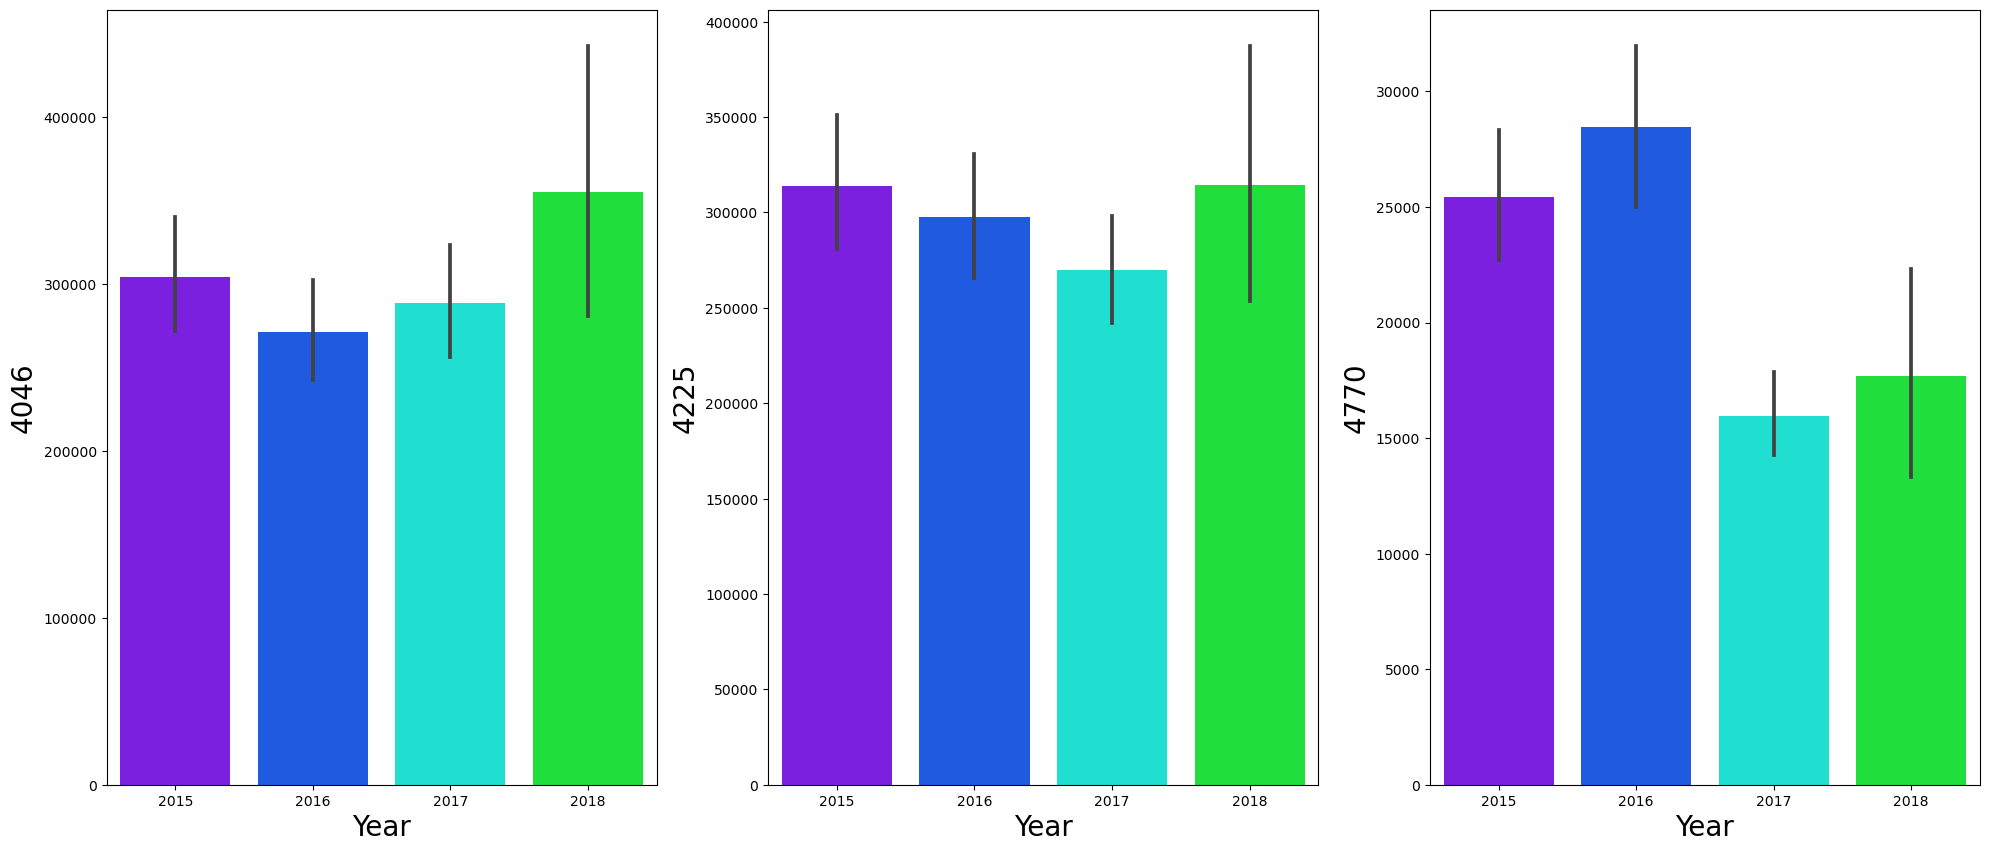

In [87]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
y = data[['4046','4225','4770']]
X = data['year']
for col in y:
    if plotnumber<=9:
        plt.subplot(3,3,plotnumber)
        sns.barplot(X,y[col])
        plt.xlabel('Year',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

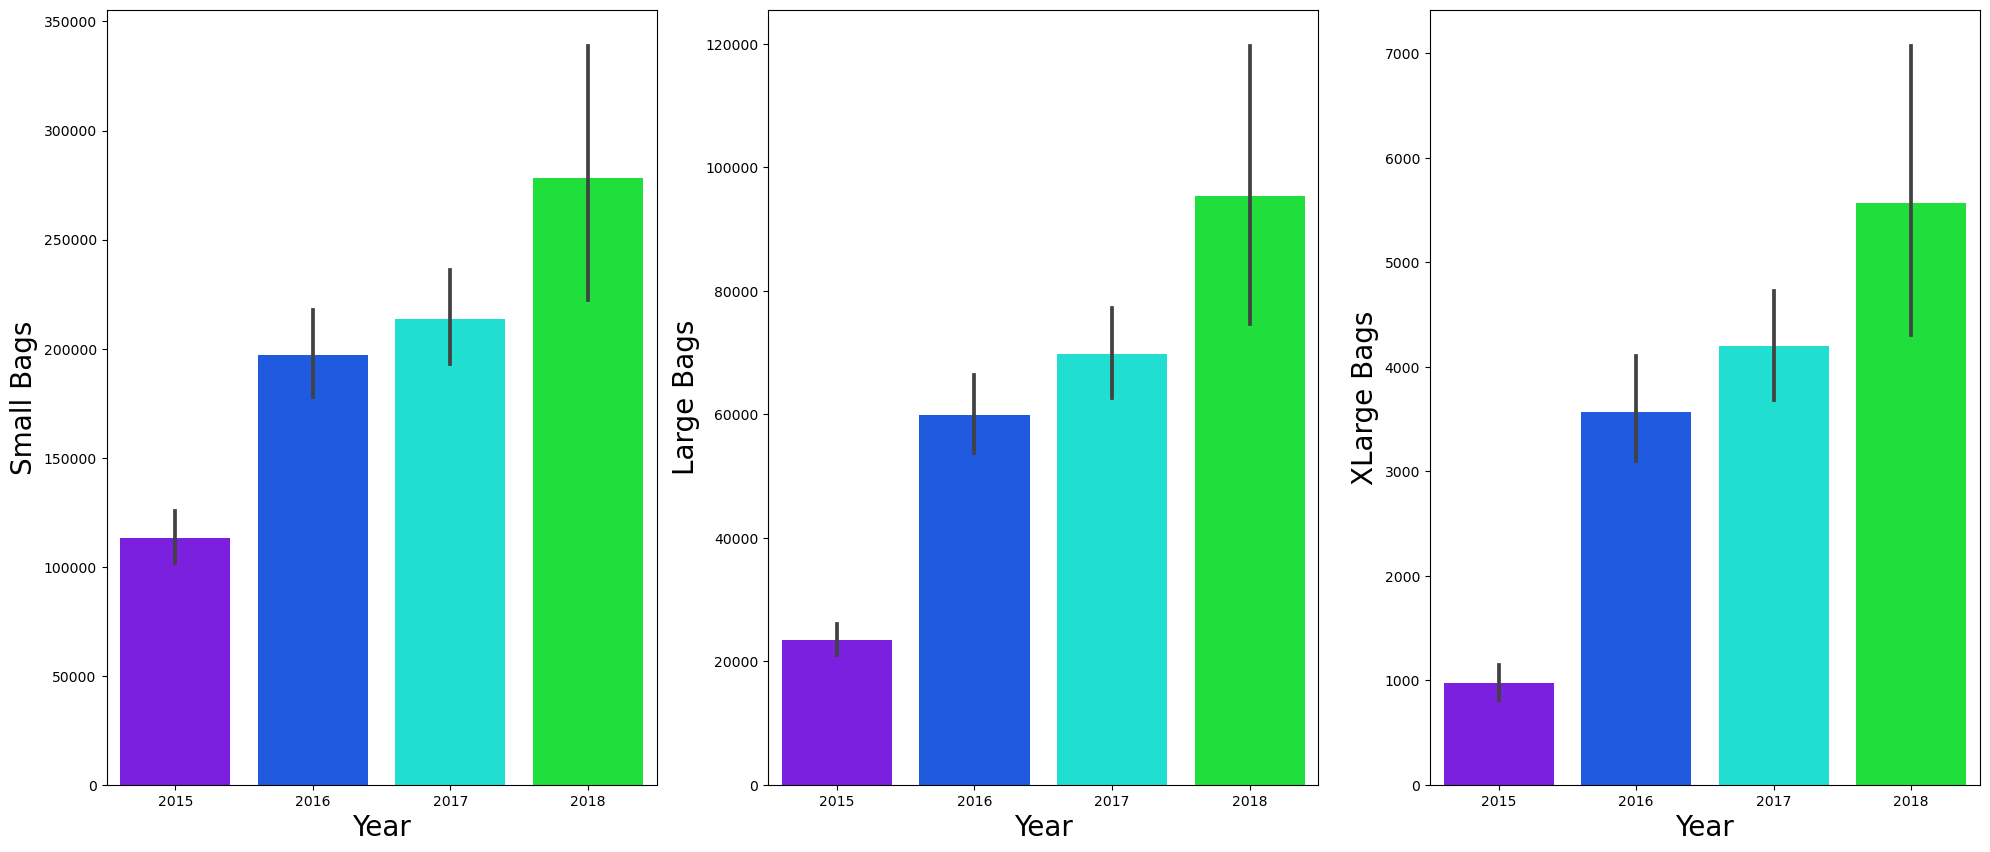

In [88]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
y = data[['Small Bags','Large Bags','XLarge Bags']]
X = data['year']
for col in y:
    if plotnumber<=9:
        plt.subplot(3,3,plotnumber)
        sns.barplot(X,y[col])
        plt.xlabel('Year',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

The sales of all three types of bags have increased over time.

Small Bags are more frequently purchased by clients than Large and XLarge Bags.

There is a relatively small customer base that is willing to purchase XLarge type bags, maybe because of the higher cost and quantity need.

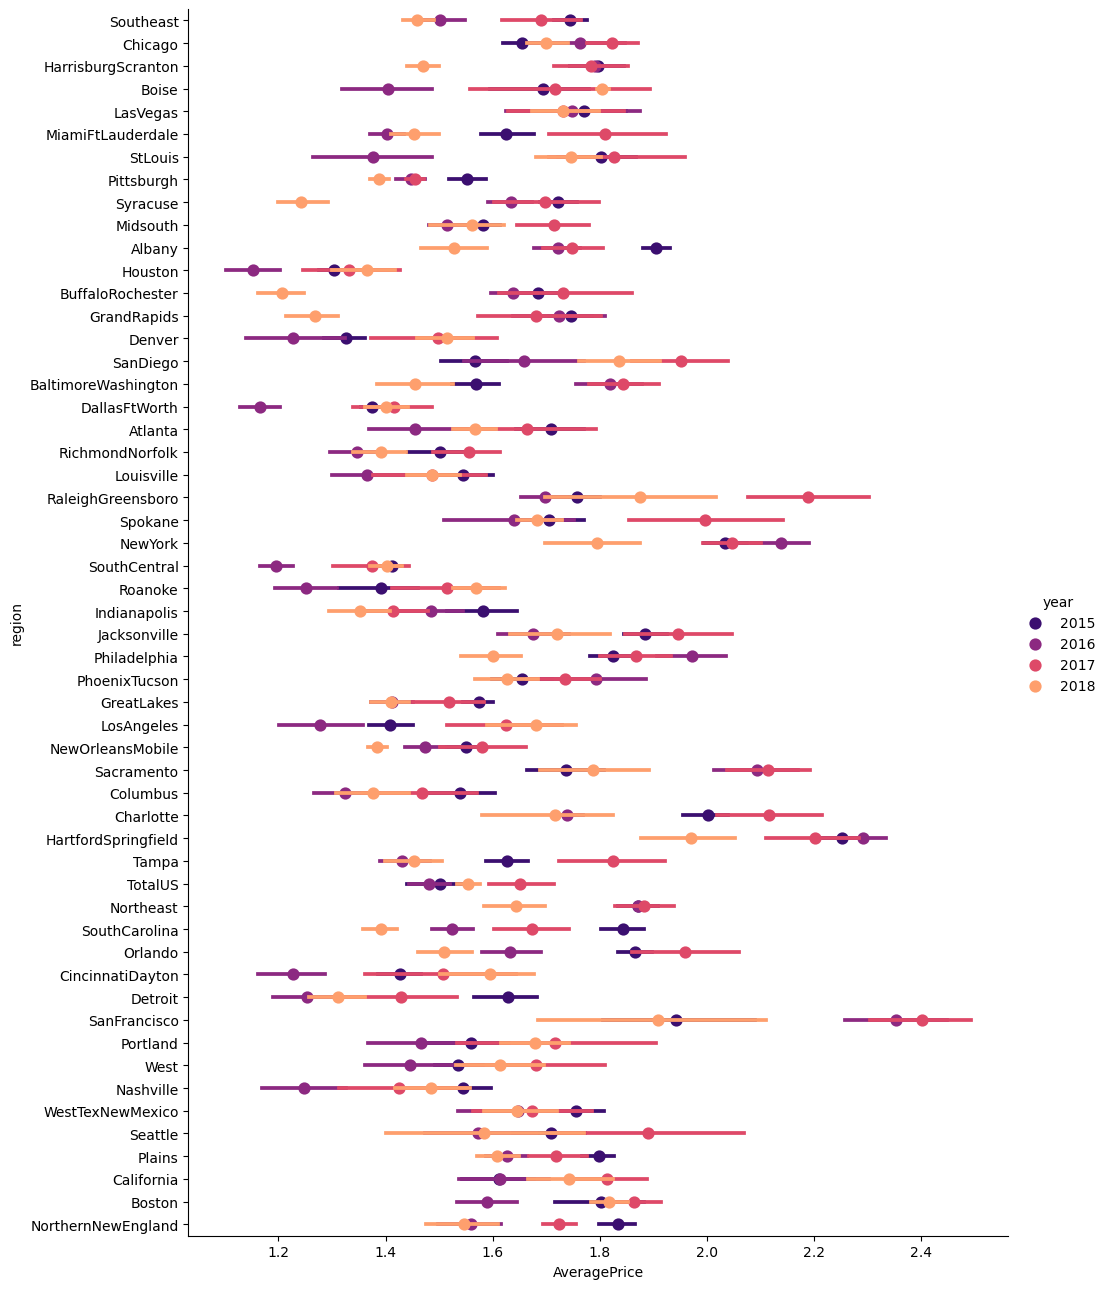

In [89]:
ask = data['type']=='conventional'
g = sns.factorplot('AveragePrice','region',data=data[mask],
                   hue='year',
                   size=13,
                   aspect=0.8,
                   palette='magma',
                   join=False,
              )

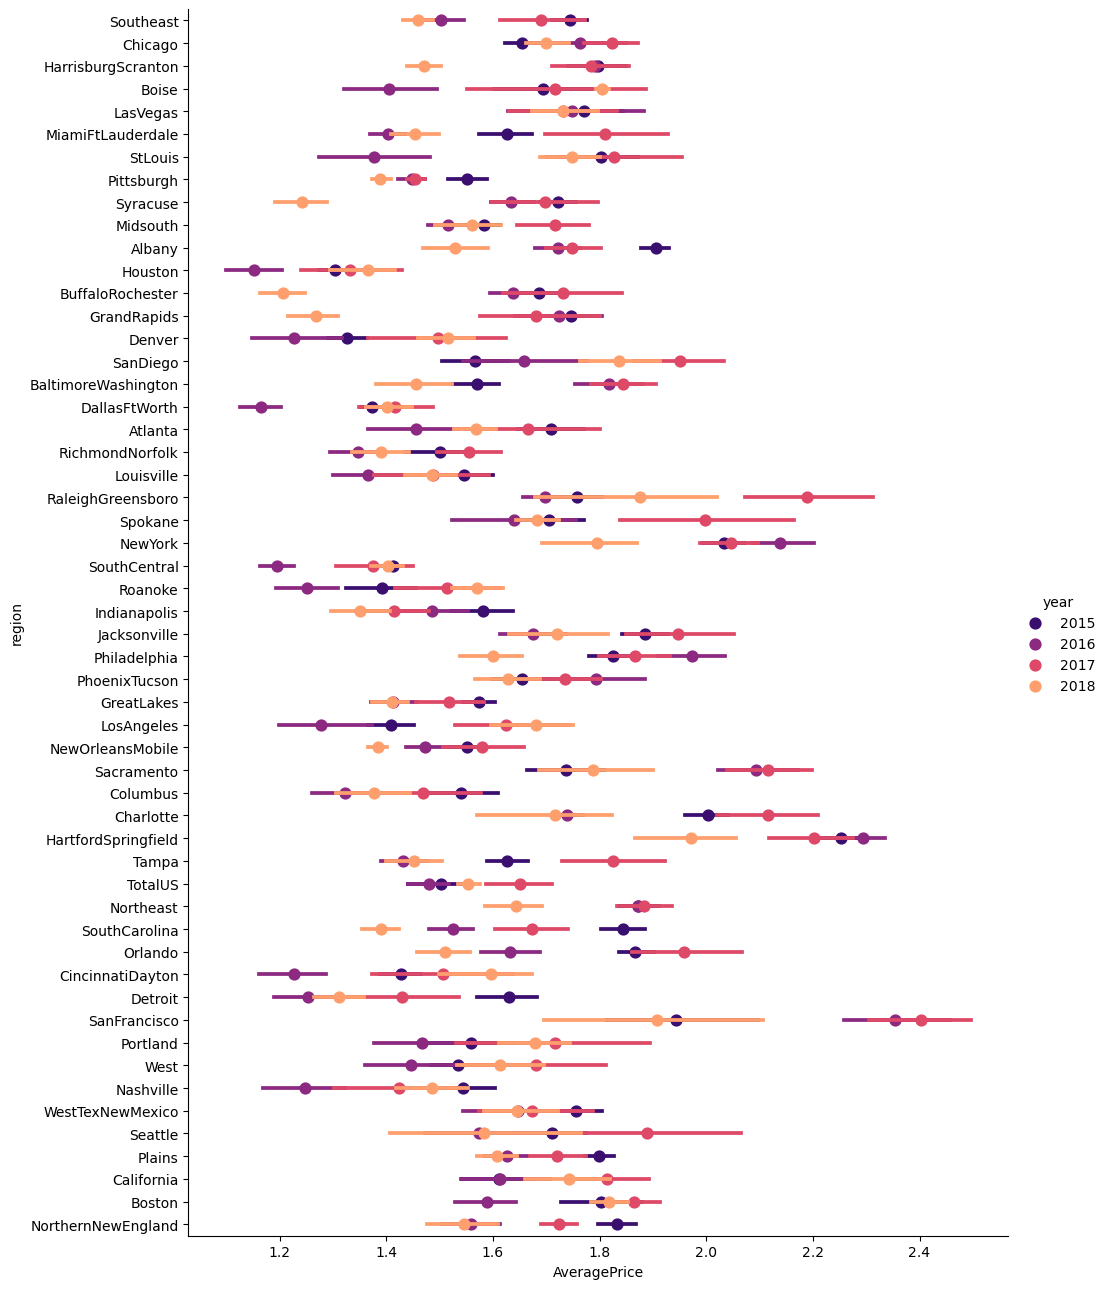

In [90]:
mask = data['type']=='organic'
g = sns.factorplot('AveragePrice','region',data=data[mask],
                   hue='year',
                   size=13,
                   aspect=0.8,
                   palette='magma',
                   join=False,
              )

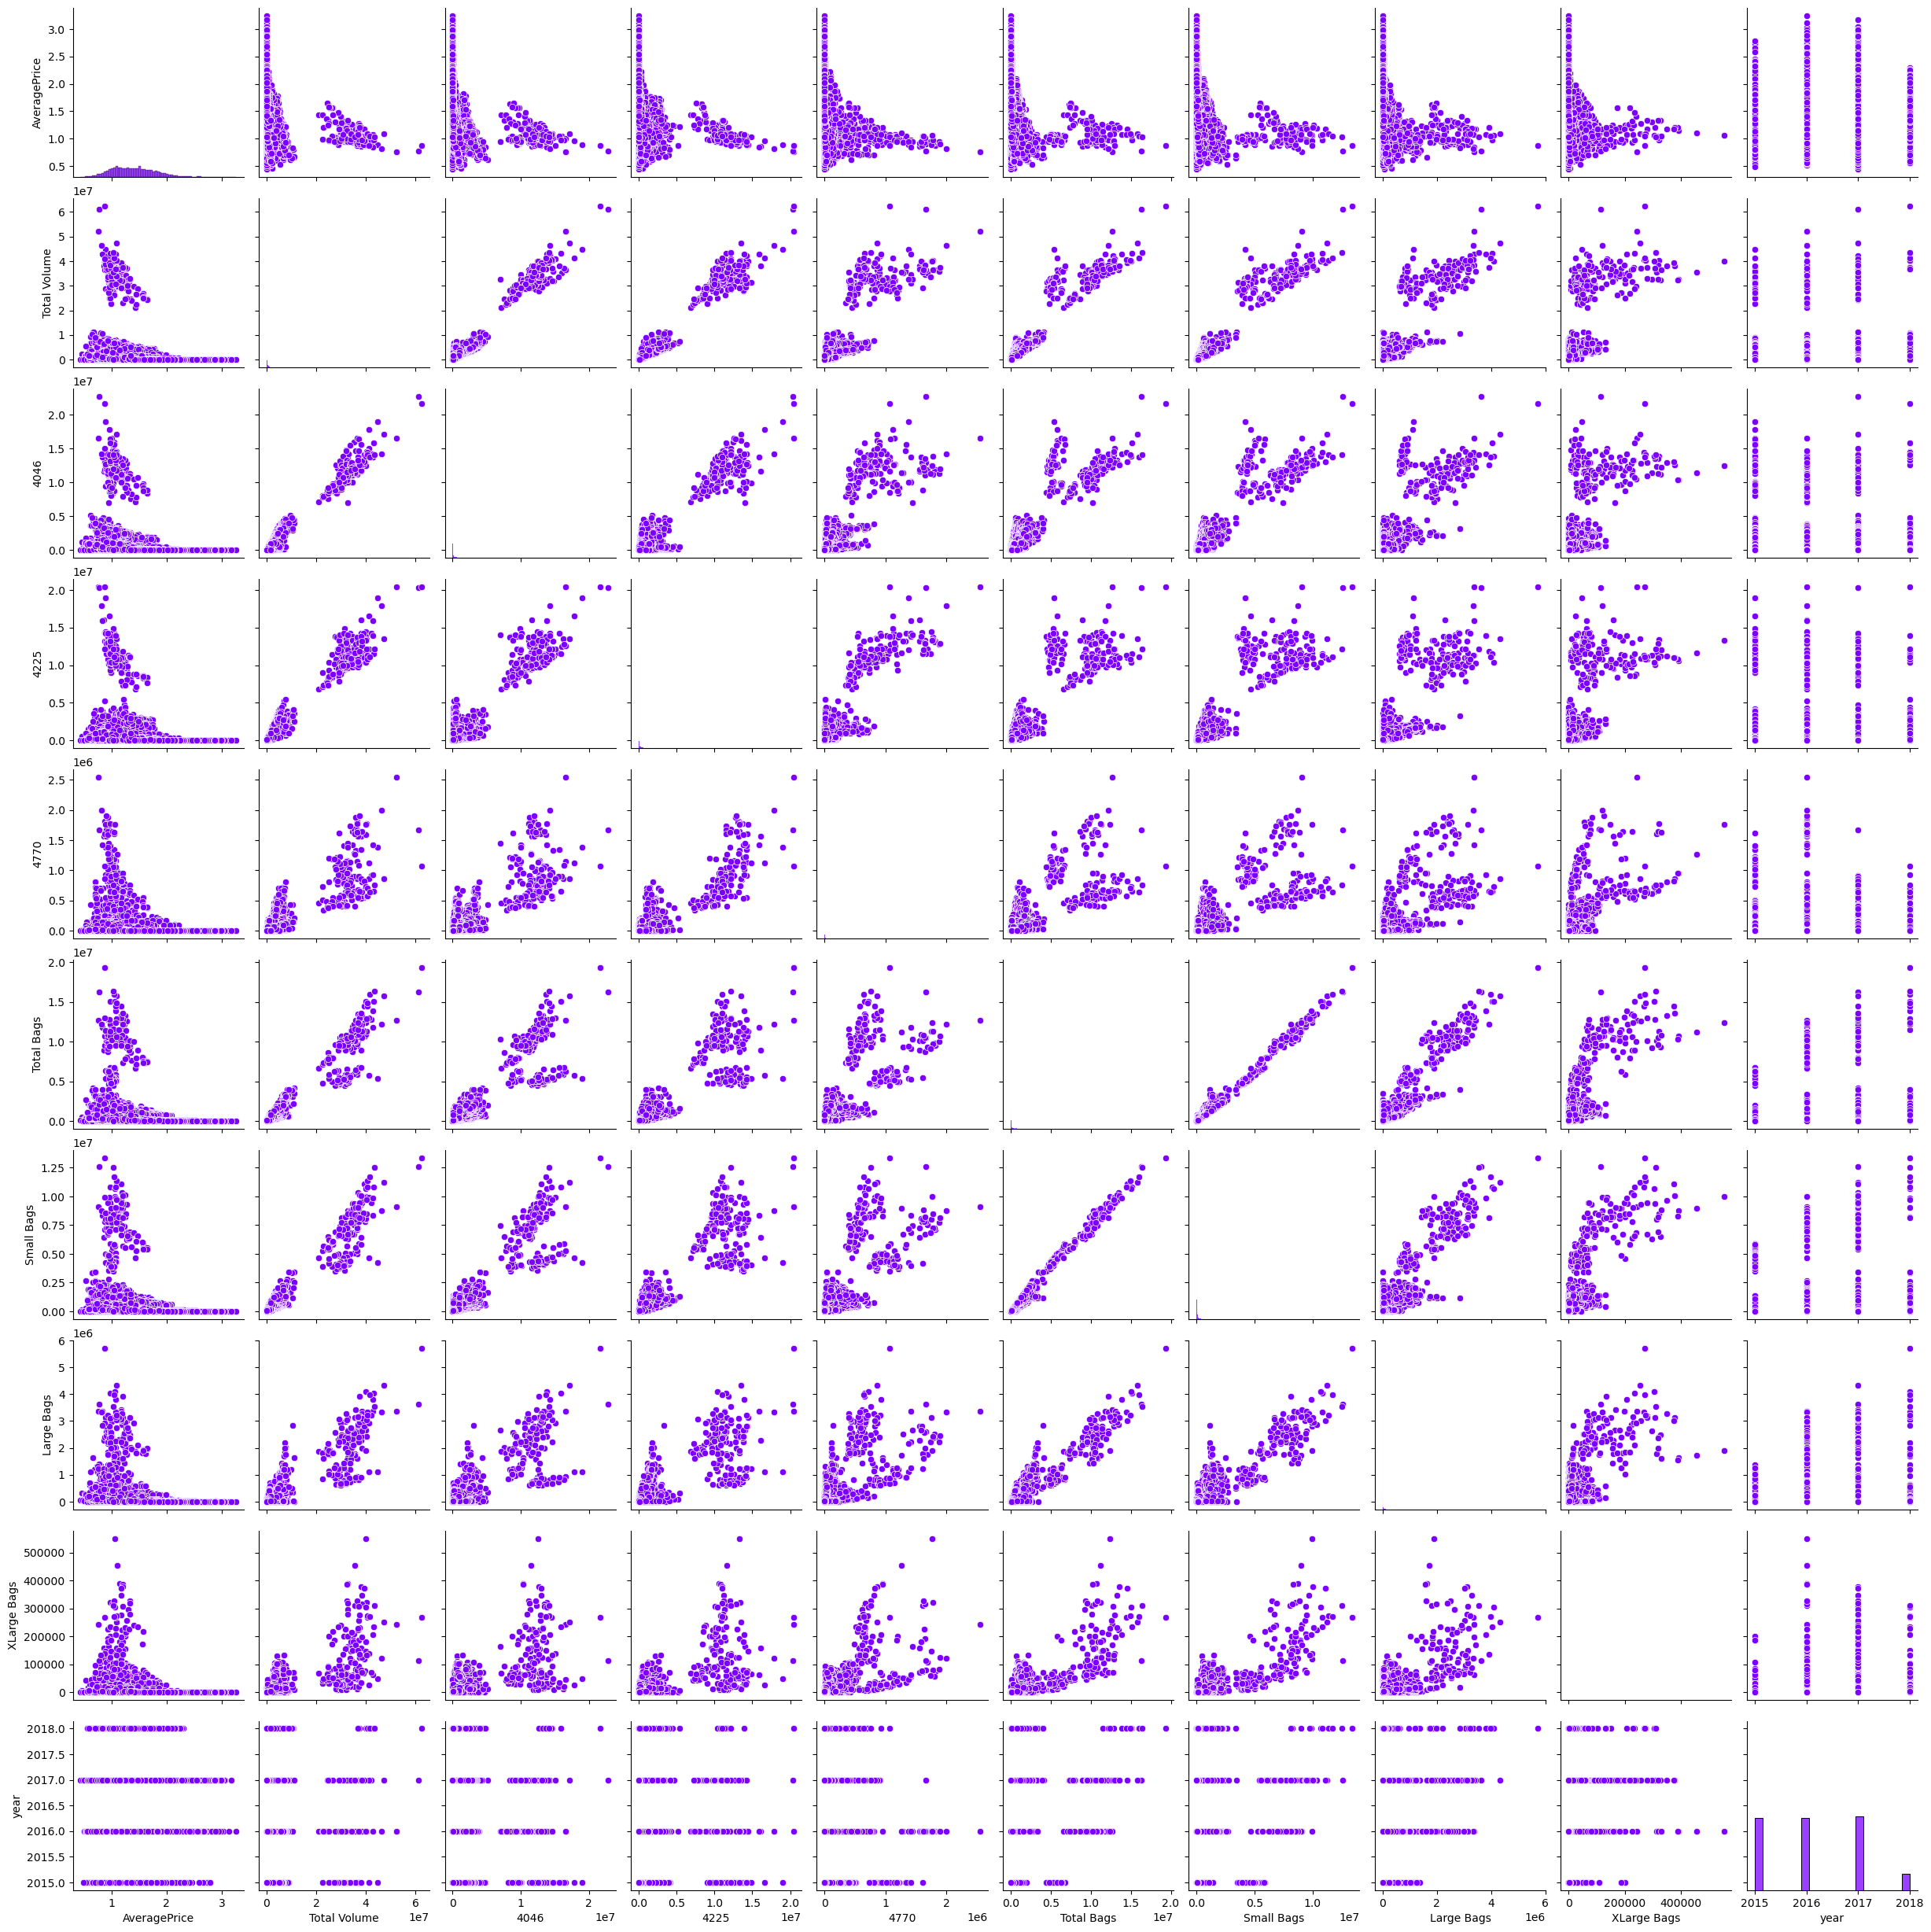

In [91]:
sns.pairplot(data)

# Encoding categorical data

In [94]:
# Using Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data2['region']=le.fit_transform(data2['region'])
data2['type']=le.fit_transform(data2['type'])
data2.head()

Unnamed: 0  AveragePrice  Total Volume     4046       4225    4770  \
0           0          1.33      64236.62  1036.74   54454.85   48.16   
1           1          1.35      54876.98   674.28   44638.81   58.33   
2           2          0.93     118220.22   794.70  109149.67  130.50   
3           3          1.08      78992.15  1132.00   71976.41   72.58   
4           4          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags  type  region  Year  Month  
0     8696.87     8603.62       93.25          0.0     0       0  2015     12  
1     9505.56     9408.07       97.49          0.0     0       0  2015     12  
2     8145.35     8042.21      103.14          0.0     0       0  2015     12  
3     5811.16     5677.40      133.76          0.0     0       0  2015     12  
4     6183.95     5986.26      197.69          0.0     0       0  2015     11

# Outliers Treatment

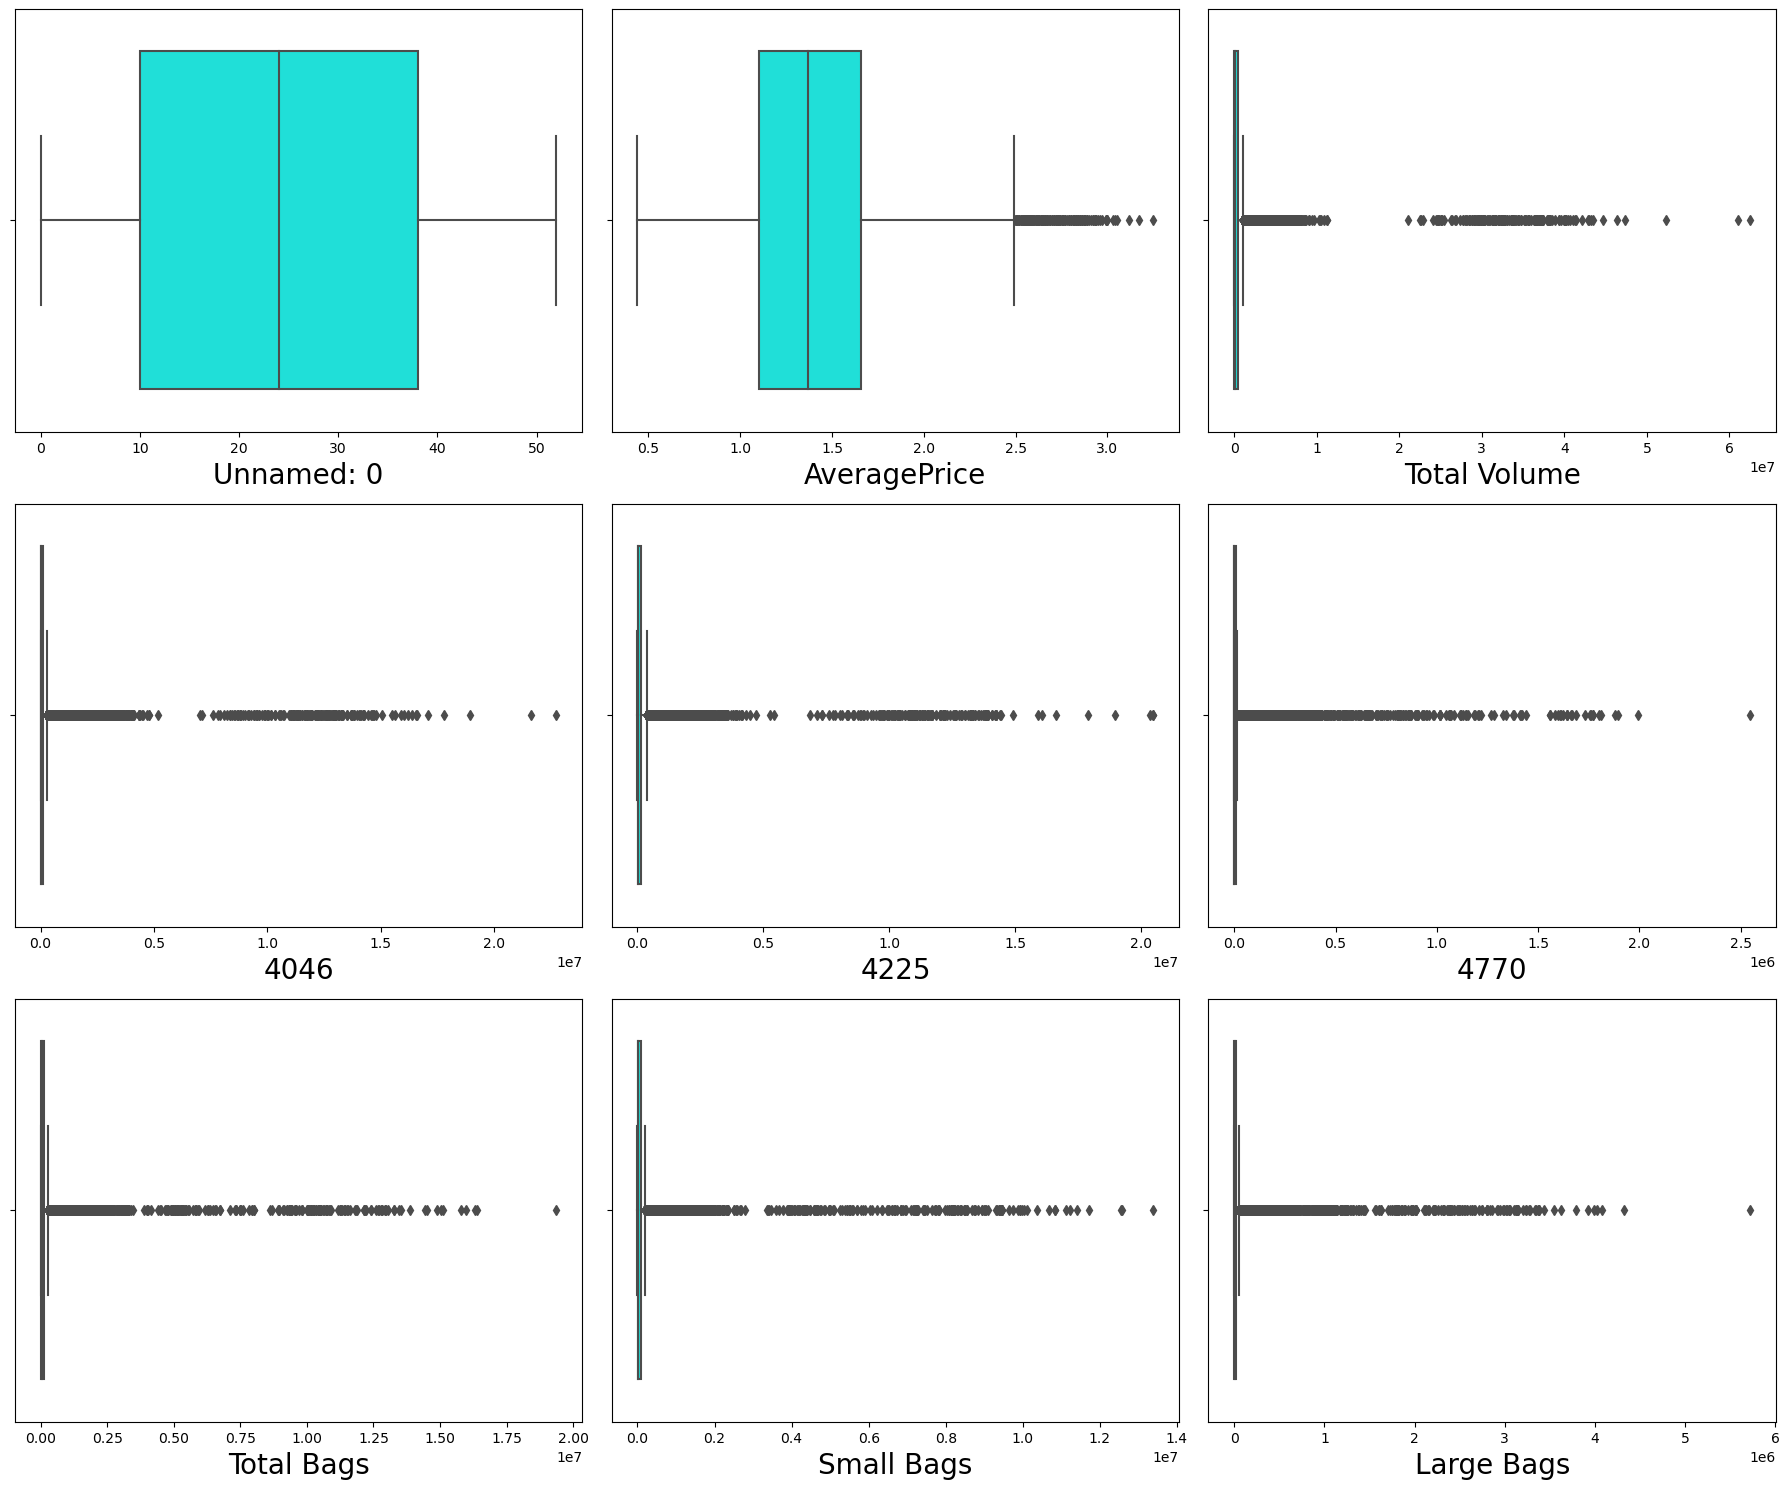

In [95]:
plt.figure(figsize=(18,15), facecolor='white')
plotnumber =1
for column in data2:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(data2[column], palette='hsv')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [96]:
from scipy.stats import zscore
z = np.abs(zscore(data2))
threshold = 3
data4 = data2[(z<3).all(axis = 1)]

In [97]:
print('Shape of dataset after detectings and removing outliers :',data4.shape)

Shape of dataset after removing outliers : (17651, 14)


In [98]:
print('Percentage of Data Loss after outliers removal :',((18249-17651)/18249)*100,'%')

Percentage of Data Loss after outliers removal : 3.276891884486821 %


# Correlation

In [99]:
data4.corr()

Unnamed: 0  AveragePrice  Total Volume      4046      4225  \
Unnamed: 0      1.000000     -0.126781      0.017336  0.019337  0.029467   
AveragePrice   -0.126781      1.000000     -0.332056 -0.333577 -0.243988   
Total Volume    0.017336     -0.332056      1.000000  0.876307  0.871592   
4046            0.019337     -0.333577      0.876307  1.000000  0.565118   
4225            0.029467     -0.243988      0.871592  0.565118  1.000000   
4770            0.052711     -0.243465      0.647518  0.492127  0.620221   
Total Bags     -0.016020     -0.297323      0.912184  0.727981  0.757786   
Small Bags     -0.011083     -0.275771      0.905648  0.706800  0.778761   
Large Bags     -0.026140     -0.270915      0.640642  0.561060  0.451711   
XLarge Bags    -0.012751     -0.152669      0.513741  0.415432  0.392030   
type            0.004325      0.613150     -0.415476 -0.341376 -0.383138   
region         -0.001651     -0.003242      0.076676  0.119067  0.011002   
Year           -0.170651      0.091704     -0.004866 -0.034636 -0.040234   
Month          -0.780789      0.149502     -0.018645 -0.015797 -0.019844   

                  4770  Total Bags  Small Bags  Large Bags  XLarge Bags  \
Unnamed: 0    0.052711   -0.016020   -0.011083   -0.026140    -0.012751   
AveragePrice -0.243465   -0.297323   -0.275771   -0.270915    -0.152669   
Total Volume  0.647518    0.912184    0.905648    0.640642     0.513741   
4046          0.492127    0.727981    0.706800    0.561060     0.415432   
4225          0.620221    0.757786    0.778761    0.451711     0.392030   
4770          1.000000    0.557980    0.571512    0.323747     0.495976   
Total Bags    0.557980    1.000000    0.978213    0.746946     0.581690   
Small Bags    0.571512    0.978213    1.000000    0.593155     0.597700   
Large Bags    0.323747    0.746946    0.593155    1.000000     0.296864   
XLarge Bags   0.495976    0.581690    0.597700    0.296864     1.000000   
type         -0.321809   -0.378205   -0.367593   -0.286813    -0.263734   
region       -0.095972    0.085892    0.065976    0.127635    -0.044338   
Year         -0.082054    0.103442    0.086639    0.119543     0.108209   
Month        -0.027245   -0.010916   -0.013018   -0.001457     0.002843   

                  type    region      Year     Month  
Unnamed: 0    0.004325 -0.001651 -0.170651 -0.780789  
AveragePrice  0.613150 -0.003242  0.091704  0.149502  
Total Volume -0.415476  0.076676 -0.004866 -0.018645  
4046         -0.341376  0.119067 -0.034636 -0.015797  
4225         -0.383138  0.011002 -0.040234 -0.019844  
4770         -0.321809 -0.095972 -0.082054 -0.027245  
Total Bags   -0.378205  0.085892  0.103442 -0.010916  
Small Bags   -0.367593  0.065976  0.086639 -0.013018  
Large Bags   -0.286813  0.127635  0.119543 -0.001457  
XLarge Bags  -0.263734 -0.044338  0.108209  0.002843  
type          1.000000  0.018409  0.003867 -0.009499  
region        0.018409  1.000000 -0.004417  0.000119  
Year          0.003867 -0.004417  1.000000 -0.175287  
Month        -0.009499  0.000119 -0.175287  1.000000

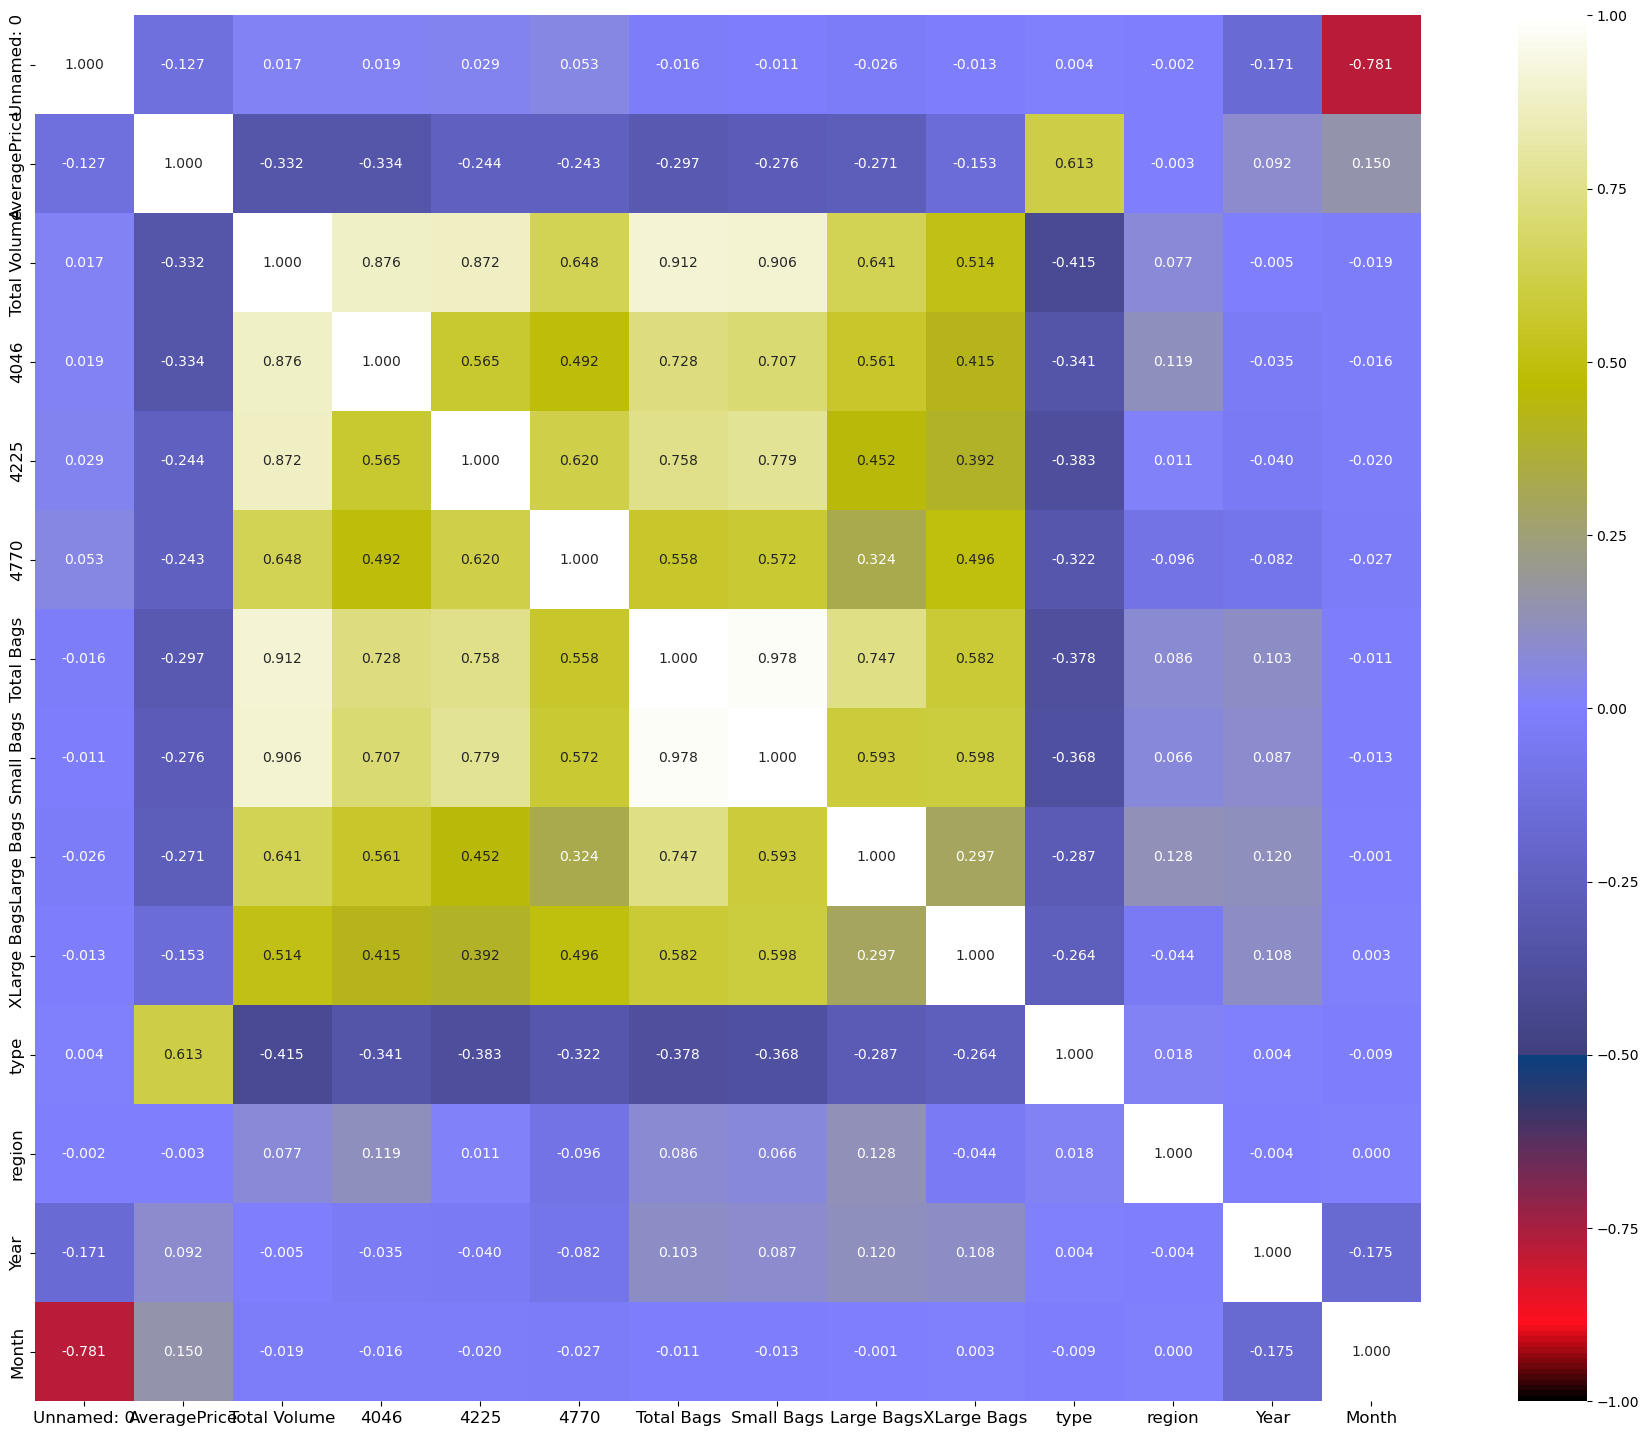

In [100]:
plt.figure(figsize=(25,18))
sns.heatmap(data4.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

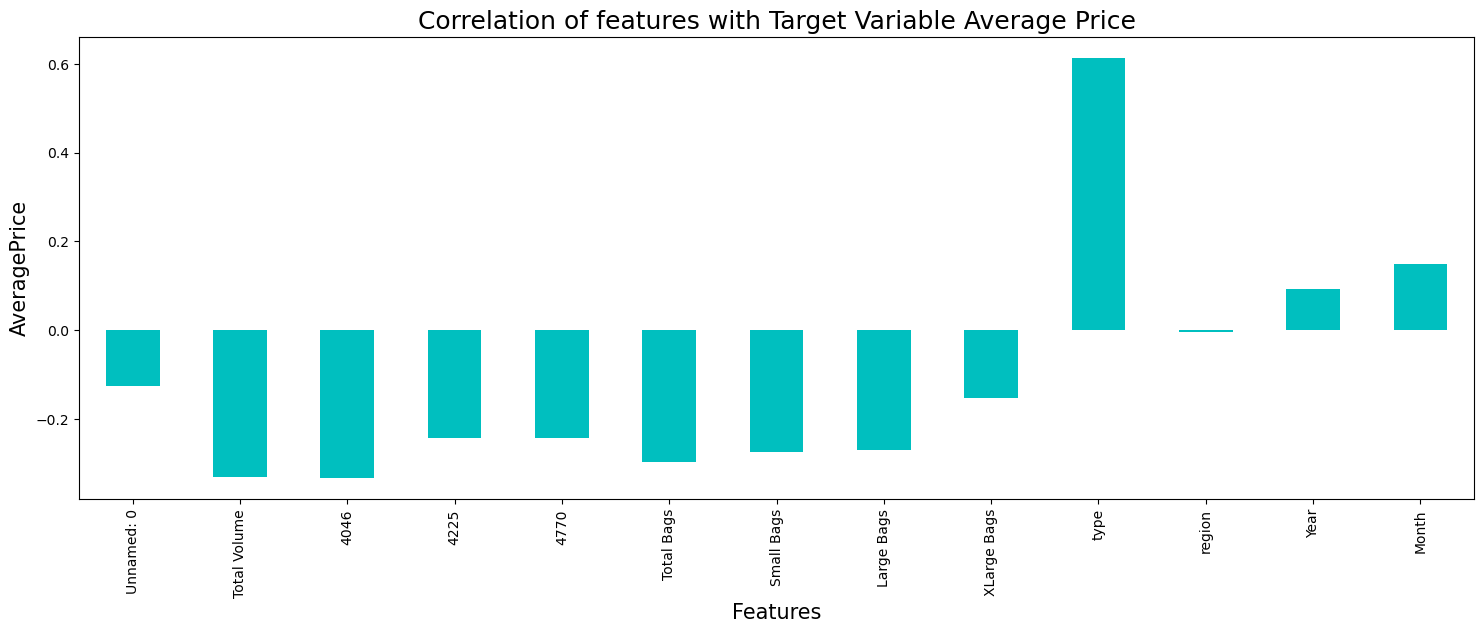

In [102]:
plt.figure(figsize = (18,6))
data4.corr()['AveragePrice'].drop(['AveragePrice']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('AveragePrice',fontsize=15)
plt.title('Correlation of features with Target Variable Average Price',fontsize = 18)
plt.show()

# Only type, year, and month had positive correlations with the target variable, with the other of features having strong negative correlations.

In [104]:
data4.head(10)

Unnamed: 0  AveragePrice  Total Volume     4046       4225    4770  \
0           0          1.33      64236.62  1036.74   54454.85   48.16   
1           1          1.35      54876.98   674.28   44638.81   58.33   
2           2          0.93     118220.22   794.70  109149.67  130.50   
3           3          1.08      78992.15  1132.00   71976.41   72.58   
4           4          1.28      51039.60   941.48   43838.39   75.78   
5           5          1.26      55979.78  1184.27   48067.99   43.61   
6           6          0.99      83453.76  1368.92   73672.72   93.26   
7           7          0.98     109428.33   703.75  101815.36   80.00   
8           8          1.02      99811.42  1022.15   87315.57   85.34   
9           9          1.07      74338.76   842.40   64757.44  113.00   

   Total Bags  Small Bags  Large Bags  XLarge Bags  type  region  Year  Month  
0     8696.87     8603.62       93.25          0.0     0       0  2015     12  
1     9505.56     9408.07       97.49          0.0     0       0  2015     12  
2     8145.35     8042.21      103.14          0.0     0       0  2015     12  
3     5811.16     5677.40      133.76          0.0     0       0  2015     12  
4     6183.95     5986.26      197.69          0.0     0       0  2015     11  
5     6683.91     6556.47      127.44          0.0     0       0  2015     11  
6     8318.86     8196.81      122.05          0.0     0       0  2015     11  
7     6829.22     6266.85      562.37          0.0     0       0  2015     11  
8    11388.36    11104.53      283.83          0.0     0       0  2015     11  
9     8625.92     8061.47      564.45          0.0     0       0  2015     10

# Action:
We will exclude certain columns that are not necessary for further analysis.

1.The numbers 4046,4225, and 4770 exhibit multicollinearity with the total volume. These features are nothing more than the total amount of avocado sold in a certain grade, which is already included in the total volume. Since we lack pricing information for each grade of avocado. In an ML model, these features are meaningless.Thus, throw them away.

2.The same is true with Total bags. The total of all other types of bags is the number of bags. We're going to continue dropping total bags and keeping track of various bag sizes and counts.

3.The region feature is the next to be dropped since it has extremely weak correlation with other Features.



In [108]:
data4.drop(columns=['4046','4225','4770','region','Total Bags'],axis=1, inplace=True)

In [109]:
data4.head()

Unnamed: 0  AveragePrice  Total Volume  Small Bags  Large Bags  \
0           0          1.33      64236.62     8603.62       93.25   
1           1          1.35      54876.98     9408.07       97.49   
2           2          0.93     118220.22     8042.21      103.14   
3           3          1.08      78992.15     5677.40      133.76   
4           4          1.28      51039.60     5986.26      197.69   

   XLarge Bags  type  Year  Month  
0          0.0     0  2015     12  
1          0.0     0  2015     12  
2          0.0     0  2015     12  
3          0.0     0  2015     12  
4          0.0     0  2015     11

Making use of the variance_inflation_factor to examine multicollinearity between features

In [111]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(data4.values,i) for i in range(data4.shape[1])]
vif['Features']= data4.columns
vif

VIF      Features
0   8.915814    Unnamed: 0
1  24.373378  AveragePrice
2   7.822771  Total Volume
3   7.761301    Small Bags
4   1.977068    Large Bags
5   1.693554   XLarge Bags
6   3.643827          type
7  42.665915          Year
8  10.536329         Month

We will drop Year as it is less than 50% correlated with target feature and For most of input features correlated with less than 10%.

In [113]:
data4.drop(columns=['Year'],axis=1, inplace=True)

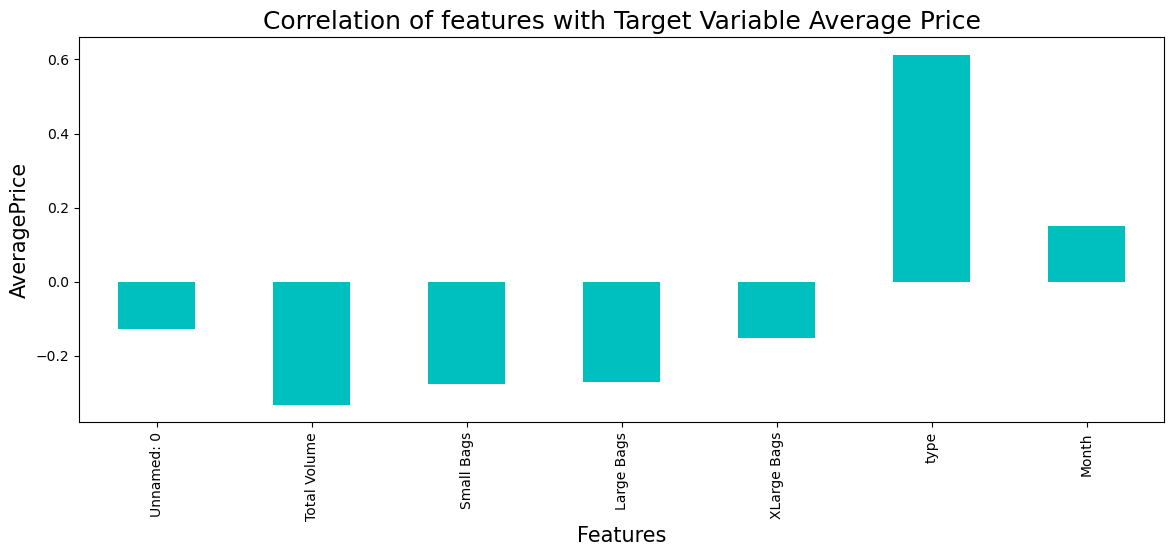

In [114]:
plt.figure(figsize = (14,5))
data4.corr()['AveragePrice'].drop(['AveragePrice']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('AveragePrice',fontsize=15)
plt.title('Correlation of features with Target Variable Average Price',fontsize = 18)
plt.show()

Now let's check the skewness of the features

In [115]:
data4.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [116]:
data4.head()

AveragePrice  Total Volume  Small Bags  Large Bags  XLarge Bags  type  \
0          1.33      64236.62     8603.62       93.25          0.0     0   
1          1.35      54876.98     9408.07       97.49          0.0     0   
2          0.93     118220.22     8042.21      103.14          0.0     0   
3          1.08      78992.15     5677.40      133.76          0.0     0   
4          1.28      51039.60     5986.26      197.69          0.0     0   

   Month  
0     12  
1     12  
2     12  
3     12  
4     11

# Skewness transformation using log transform

In [117]:
for col in data4.columns:
    if data4.skew().loc[col]>0.55:
        data4[col]=np.log1p(data4[col])

In [119]:
X = data4.drop('AveragePrice', axis=1)
Y = data4['AveragePrice']

In [120]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

# ML Model 

In [121]:
#Importing important libraries which will be utilised in the process
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=42, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (11826, 6)
Training target vector size: (11826,)
Test feature matrix size: (5825, 6)
Test target vector size: (5825,)


In [123]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.46995615775000343 on Random_state 557


# Linear Regression 

In [124]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=557, test_size=.33)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

Predicted Wins:
 [1.0918524  1.234798   1.60179338 ... 1.70481371 1.6431685  1.6354547 ]


Actual Wins:
 8841     1.35
859      1.19
17369    2.09
11190    1.05
14051    2.03
         ... 
5452     1.05
3489     1.35
14534    1.22
11925    1.71
11077    1.83
Name: AveragePrice, Length: 5825, dtype: float64


# LR Evaluation Matrix

In [125]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 0.22390630602712788
Mean squared error : 0.08082880539614365
Root Mean Squared Error: 0.2843040720709847


 R2 Score :
0.46995615775000343


In [126]:
# Cross Validation
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X_scale, Y, cv =5)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : LinearRegression() :

Mean CV Score : -0.013708960907187184


# Applying other Regression Model, Evaluation & Crossvalidation Methods

In [127]:
rf = RandomForestRegressor(n_estimators = 70 ,max_depth=25)
dtc = DecisionTreeRegressor()
adb=AdaBoostRegressor(learning_rate=0.1)
gradb=GradientBoostingRegressor(max_depth=25,learning_rate=0.1)
rd=Ridge(alpha=0.01)
xgb=XGBRegressor()
model = [rf,rd,dtc,adb,gradb,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('----------------------------------------------------------------------------------------------------------------------------------')



 Error of  RandomForestRegressor(max_depth=25, n_estimators=70) :
Mean absolute error : 0.16155338929099372
Mean squared error : 0.048044363761254365
Root Mean Squared Error: 0.21919024558874503


 R2 Score :
0.6849437642723502
----------------------------------------------------------------------------------------------------------------------------------


 Error of  Ridge(alpha=0.01) :
Mean absolute error : 0.22390631596350802
Mean squared error : 0.08082881097903075
Root Mean Squared Error: 0.2843040818894986


 R2 Score :
0.46995612113960306
----------------------------------------------------------------------------------------------------------------------------------


 Error of  DecisionTreeRegressor() :
Mean absolute error : 0.20886695278969958
Mean squared error : 0.09076211158798284
Root Mean Squared Error: 0.3012675083509386


 R2 Score :
0.4048174023970841
-------------------------------------------------------------------------------------------------------------------

In [128]:
# Cross Validation
model = [rf,rd,dtc,adb,gradb,xgb]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    



Cross Validation Score : RandomForestRegressor(max_depth=25, n_estimators=70) :

Mean CV Score : -0.19166342906881123


Cross Validation Score : Ridge(alpha=0.01) :

Mean CV Score : -0.013709058462111012


Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : -0.8320535907337925


Cross Validation Score : AdaBoostRegressor(learning_rate=0.1) :

Mean CV Score : -0.031003991232547358


Cross Validation Score : GradientBoostingRegressor(max_depth=25) :

Mean CV Score : -0.7738173903304226


Cross Validation Score : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_on

 We will perform Hyper Parameter Tuning on Random Forest Regressor.

Due to large volume of data GridCSV is not working as I have been waiting for 1:30 hr

# Final Model

In [132]:
from sklearn.ensemble import RandomForestRegressor
Final_mod =  RandomForestRegressor(n_estimators=60 ,criterion = 'mse', max_depth= 20, max_features = 'auto',
             min_samples_leaf = 5, min_samples_split = 10)
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 0.1682709256688734
Mean squared error : 0.050208419712875194
Root Mean Squared Error: 0.2240723537451133


 R2 Score of Final Model :
0.6707527277251764




 True Values Vs Predicted Value plot :


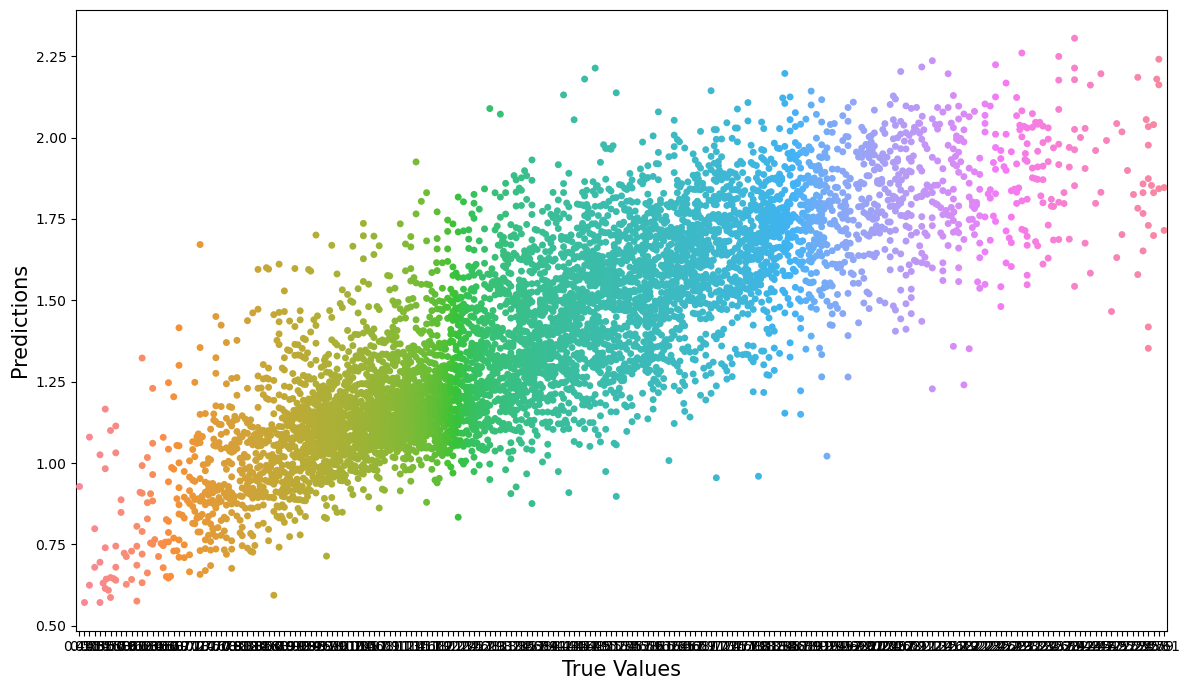

In [133]:
plt.figure(figsize=(12,7))
y_pred=Final_mod.predict(X_test)
sns.swarmplot(Y_test.round(2), y_pred)
print('\033[1m'+' True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()